##Prep:
Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in data table

In [3]:
import os

In [4]:
folderpath = '/content/drive/MyDrive/Methods_Fall2024/FinalProject/raw_data'
filename = os.listdir(folderpath)

##Read in data tables separately

### 1. read in polyA_combined tables

In [5]:
polyA_df = []
for file in filename:
  if "rRNA" in file:
    filepath = os.path.join(folderpath, file)
    print("Reading"+filepath)
    df = pd.read_excel(filepath)
    print(df.head(5)[df.columns[:5]])
    polyA_df.append(df)


Reading/content/drive/MyDrive/Methods_Fall2024/FinalProject/raw_data/rRNA_polyA_combined_data_V2 - Copy.xlsx
   SampleID Outcome Sex  Age PDL-1 Status
0  R-BMS001     NCB   M   83     NEGATIVE
1  R-BMS002     NCB   F   50     NEGATIVE
2  R-BMS003      CB   M   65     POSITIVE
3  R-BMS004      CB   F   40     POSITIVE
4  R-BMS005     NCB   F   88     NEGATIVE


## Basic information



*   82 patient samples
*   22 genes - float
*   Outcome, Sex, Age, Disease Stage, PD-L1 status - ordinal/binomial



In [6]:
polyA_df[0].dtypes
print("Numbr of rows = ", polyA_df[0].shape[0])
print("Numbr of columns = ", polyA_df[0].shape[1])

Numbr of rows =  82
Numbr of columns =  27


In [7]:
df1 = polyA_df[0].copy()
type(df1)


pandas.core.frame.DataFrame

In [8]:
df1_numeric = df1.select_dtypes(include=["float"])


In [9]:
old_mean = df1_numeric.mean()
old_median = df1_numeric.median()
old_std = df1_numeric.std()
print(old_mean)

ENSG00000204525.16    12827.625788
ENSG00000206503.13    18221.750621
ENSG00000153563.15     3816.919946
ENSG00000105374.10     2678.131411
ENSG00000077984.6      1050.868260
ENSG00000122862.5      3250.694095
ENSG00000160014.17     2067.143530
ENSG00000240065.8       292.523899
ENSG00000103187.8      3049.026707
ENSG00000130592.15     2744.145368
ENSG00000089692.9       144.745170
ENSG00000148843.15      388.487166
ENSG00000213719.8       654.647892
ENSG00000143933.18     1627.408329
ENSG00000019582.15     4321.798962
ENSG00000196230.13     1250.728654
ENSG00000117632.23      237.004722
ENSG00000111669.15      782.964578
ENSG00000111640.15     4760.247004
ENSG00000189403.15     3415.287151
ENSG00000164104.12     2805.864240
dtype: float64


The original table does not contain 0 or NA values

In [10]:
df1[df1==0].count()

,0
SampleID,0
Outcome,0
Sex,0
Age,0
PDL-1 Status,0
Disease Stage,0
ENSG00000204525.16,0
ENSG00000206503.13,0
ENSG00000153563.15,0
ENSG00000105374.10,0


In [11]:
df1[df1=="NA"].count()

,0
SampleID,0
Outcome,0
Sex,0
Age,0
PDL-1 Status,0
Disease Stage,0
ENSG00000204525.16,0
ENSG00000206503.13,0
ENSG00000153563.15,0
ENSG00000105374.10,0


## Remove outliers
After removing outliers, 45/82 samples remain

In [12]:
def remove_outliers(df):
  for col in df1_numeric.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col, "Q1 = ", Q1, "Q3 = ", Q3, "IQR = ", IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

In [13]:
df1_filtered = remove_outliers(df1)


ENSG00000204525.16 Q1 =  6744.880256930537 Q3 =  16551.254346947026 IQR =  9806.374090016488
ENSG00000206503.13 Q1 =  10869.36943301975 Q3 =  23022.59447769 IQR =  12153.22504467025
ENSG00000153563.15 Q1 =  2869.3419157170874 Q3 =  4326.604529175703 IQR =  1457.2626134586153
ENSG00000105374.10 Q1 =  977.546434232444 Q3 =  2795.960148334675 IQR =  1818.413714102231
ENSG00000077984.6 Q1 =  437.0107689237 Q3 =  1077.36318309003 IQR =  640.3524141663299
ENSG00000122862.5 Q1 =  2330.8558714110377 Q3 =  3674.78032973752 IQR =  1343.9244583264822
ENSG00000160014.17 Q1 =  1748.4284098219425 Q3 =  2383.2058701152373 IQR =  634.7774602932948
ENSG00000240065.8 Q1 =  195.51917764786876 Q3 =  353.492763454618 IQR =  157.97358580674924
ENSG00000103187.8 Q1 =  2169.41592654581 Q3 =  3541.8423467140847 IQR =  1372.4264201682745
ENSG00000130592.15 Q1 =  1972.34850673659 Q3 =  3005.40347889703 IQR =  1033.0549721604398
ENSG00000089692.9 Q1 =  58.02968394392485 Q3 =  141.97461778230598 IQR =  83.94493383

In [14]:
print("New row number = ", df1_filtered.shape[0])


New row number =  45


###Replace NCB and CB in outcome with 0/1

In [15]:
df1_filtered['Outcome'] = df1_filtered['Outcome'].replace({'NCB': 0, 'CB': 1})

<ipython-input-15-7659107908f4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_filtered['Outcome'] = df1_filtered['Outcome'].replace({'NCB': 0, 'CB': 1})


### 30 are NCB, 15 are CB

In [16]:
df1_filtered['Outcome']
df1_filtered['Outcome'][df1_filtered['Outcome'] == 0].count()

27

In [17]:
import seaborn as sns

In [ ]:
df1_numeric.columns[0]

'ENSG00000204525.16'

###Plot by histplot

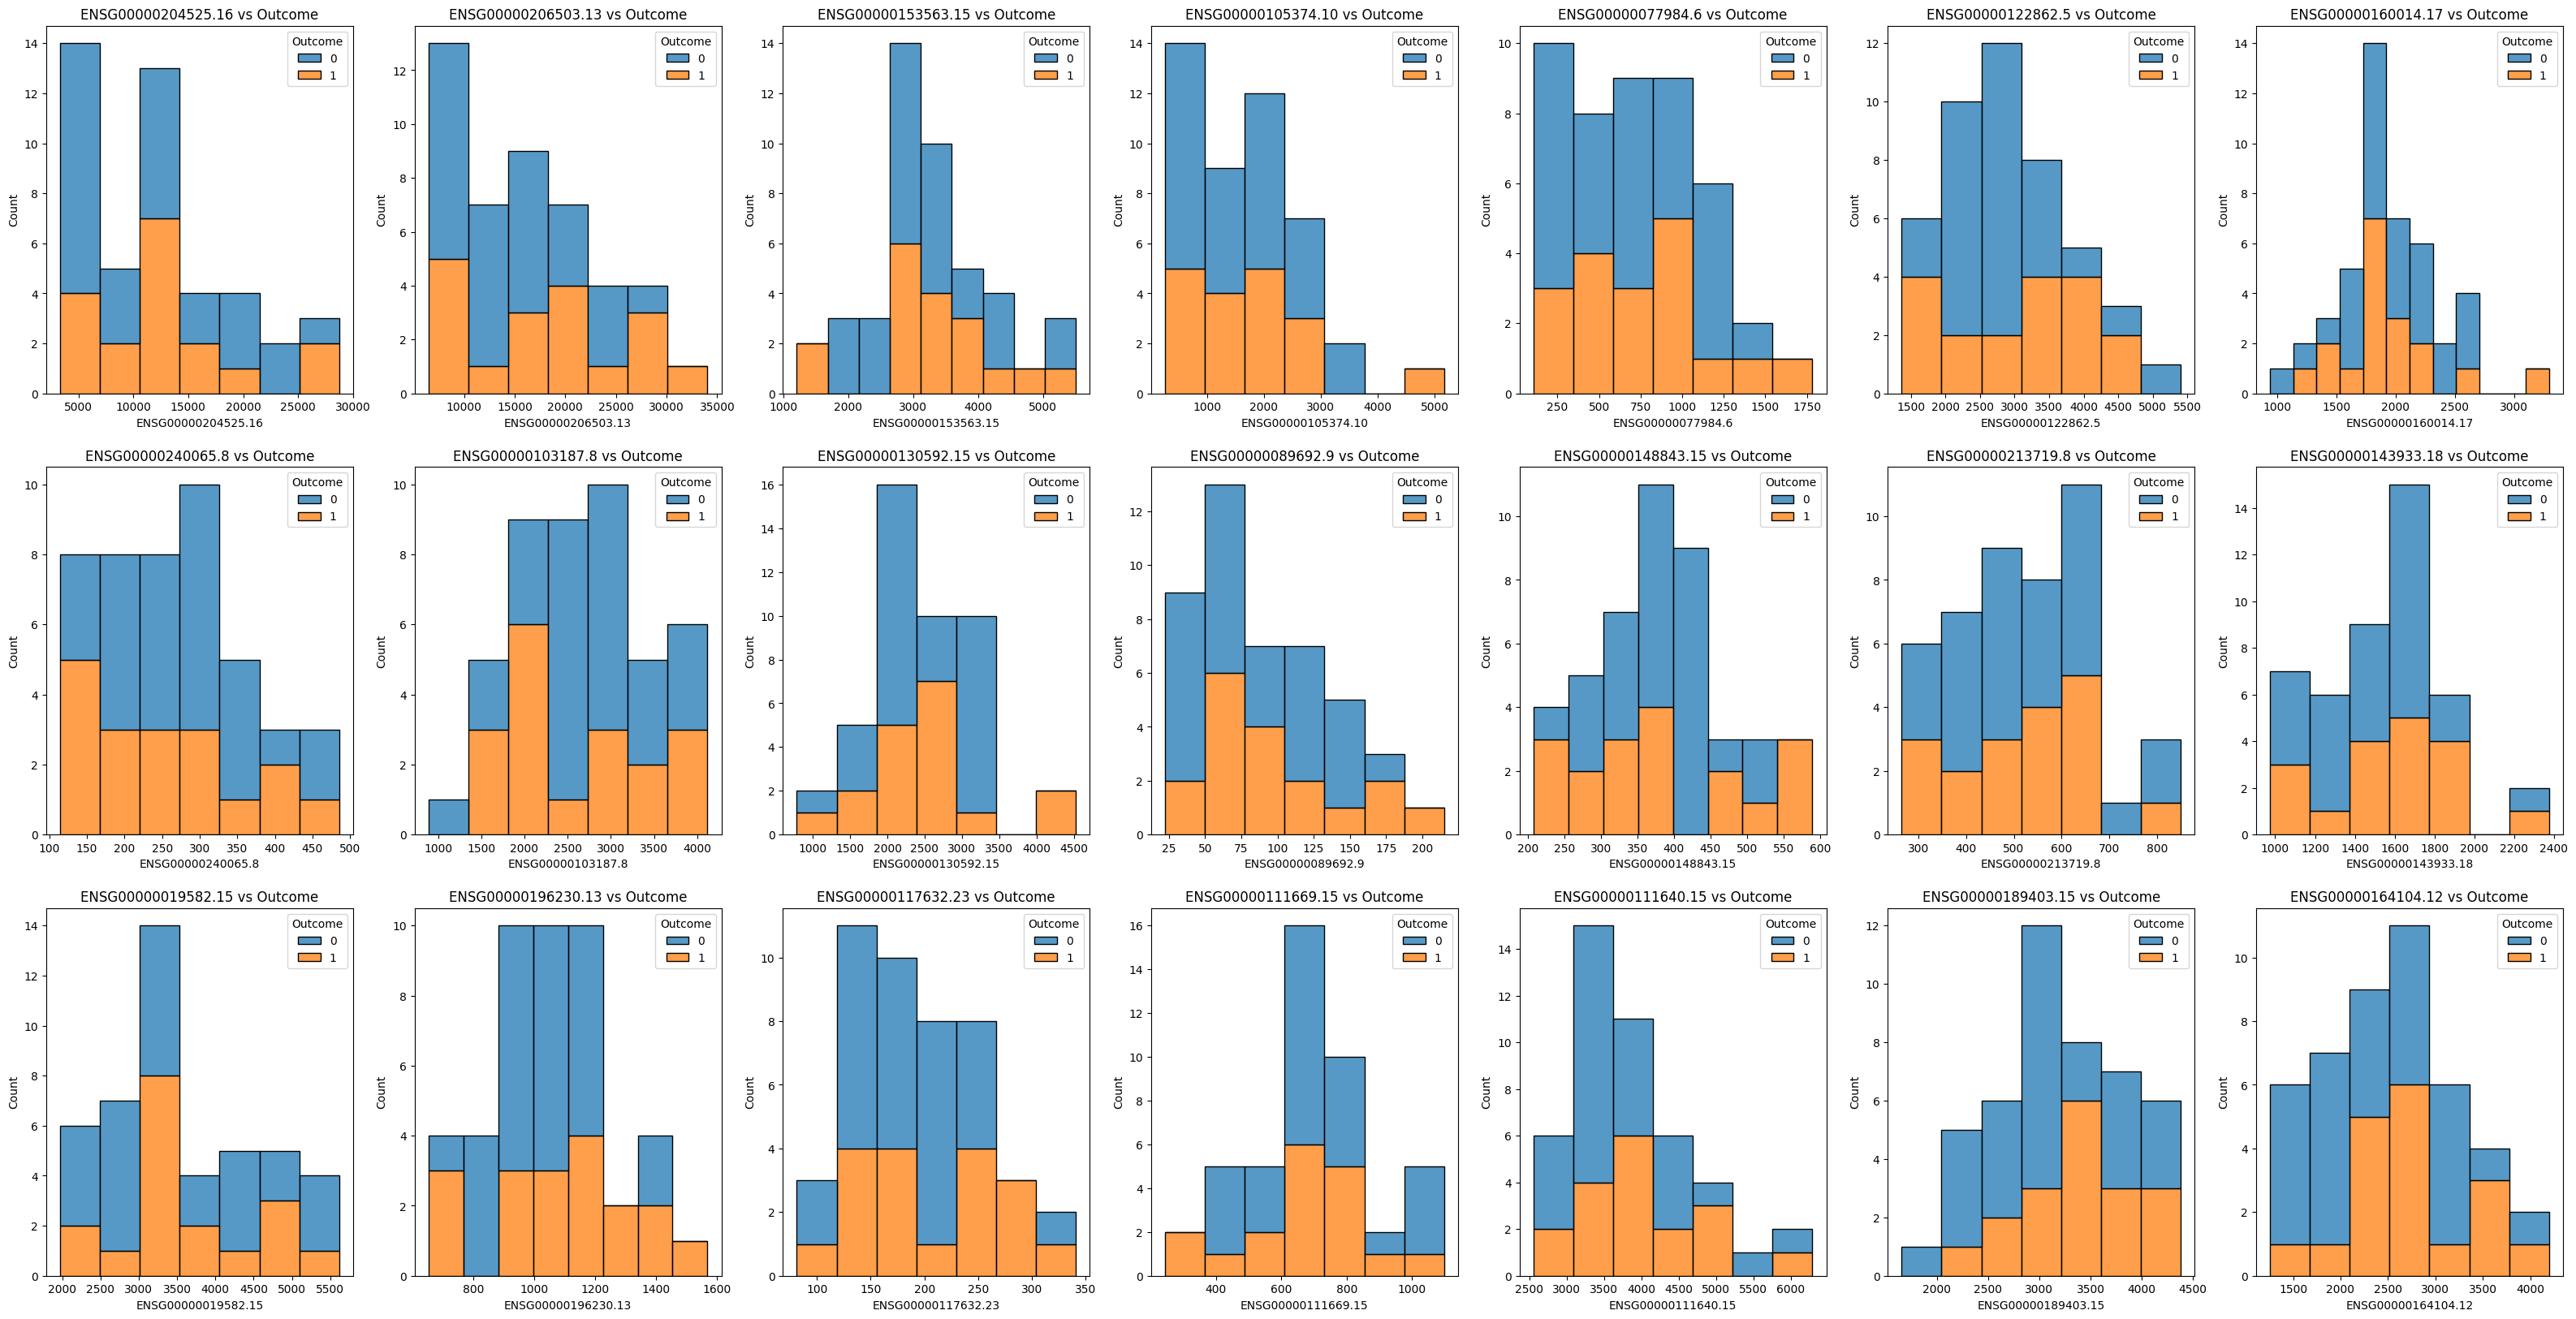

In [18]:
fig,axs = plt.subplots(3,7, figsize=(40,20))
axs = axs.flatten()
for n in range(0,len(df1_numeric.columns)):
  sns.histplot(data=df1_filtered, x=df1_numeric.columns[n], hue = 'Outcome', multiple = 'stack', ax = axs[n])
  axs[n].set_title(df1_numeric.columns[n] + " vs Outcome")

#plt.tight_layout()
plt.show()


### Plot by boxplot

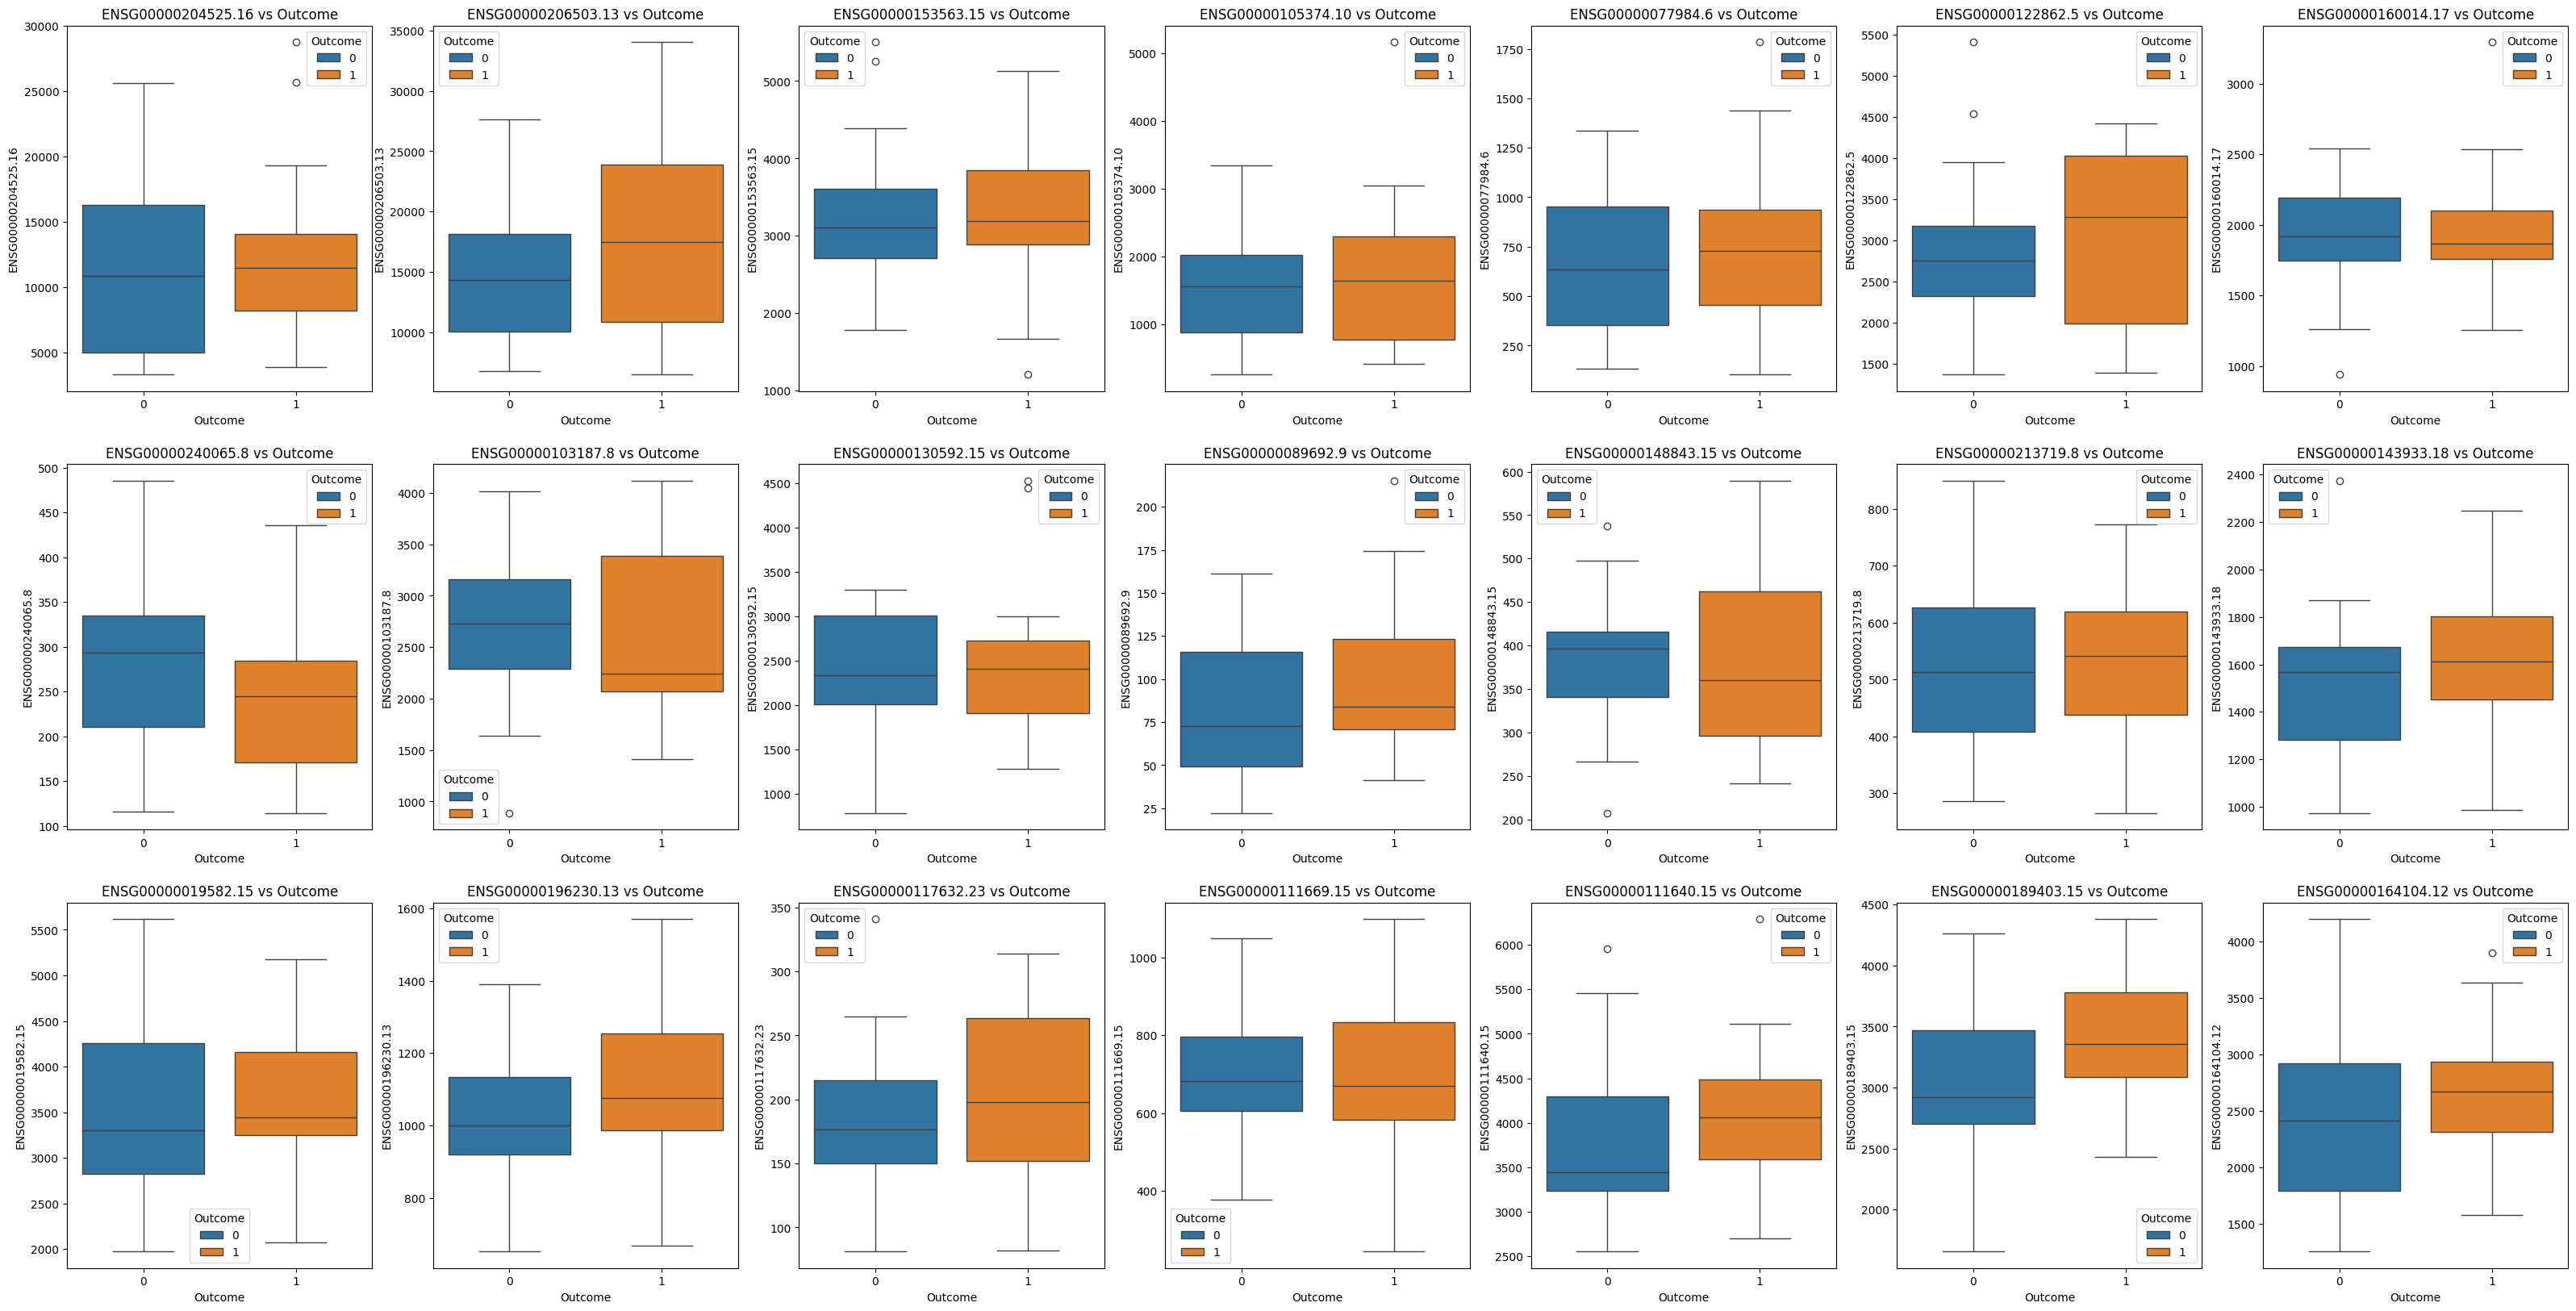

In [19]:
fig,axs = plt.subplots(3,7, figsize=(40,20))
axs = axs.flatten()
for n in range(0,len(df1_numeric.columns)):
  sns.boxplot(data=df1_filtered, y=df1_numeric.columns[n], x = 'Outcome',ax = axs[n], hue = "Outcome")
  axs[n].set_title(df1_numeric.columns[n] + " vs Outcome")

#plt.tight_layout()
plt.show()


In [20]:
df1['Outcome'] = df1['Outcome'].replace({'NCB': 0, 'CB': 1})

<ipython-input-20-00d8008ad593>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Outcome'] = df1['Outcome'].replace({'NCB': 0, 'CB': 1})


In [21]:
df1['Outcome'][df1['Outcome'] == 0].count()

49

In [ ]:
df1['Outcome']

,Outcome
0,0
1,0
2,1
3,1
4,0
...,...
77,1
78,0
79,0
80,0


In [22]:
col = df1.select_dtypes(include=["float"]).columns

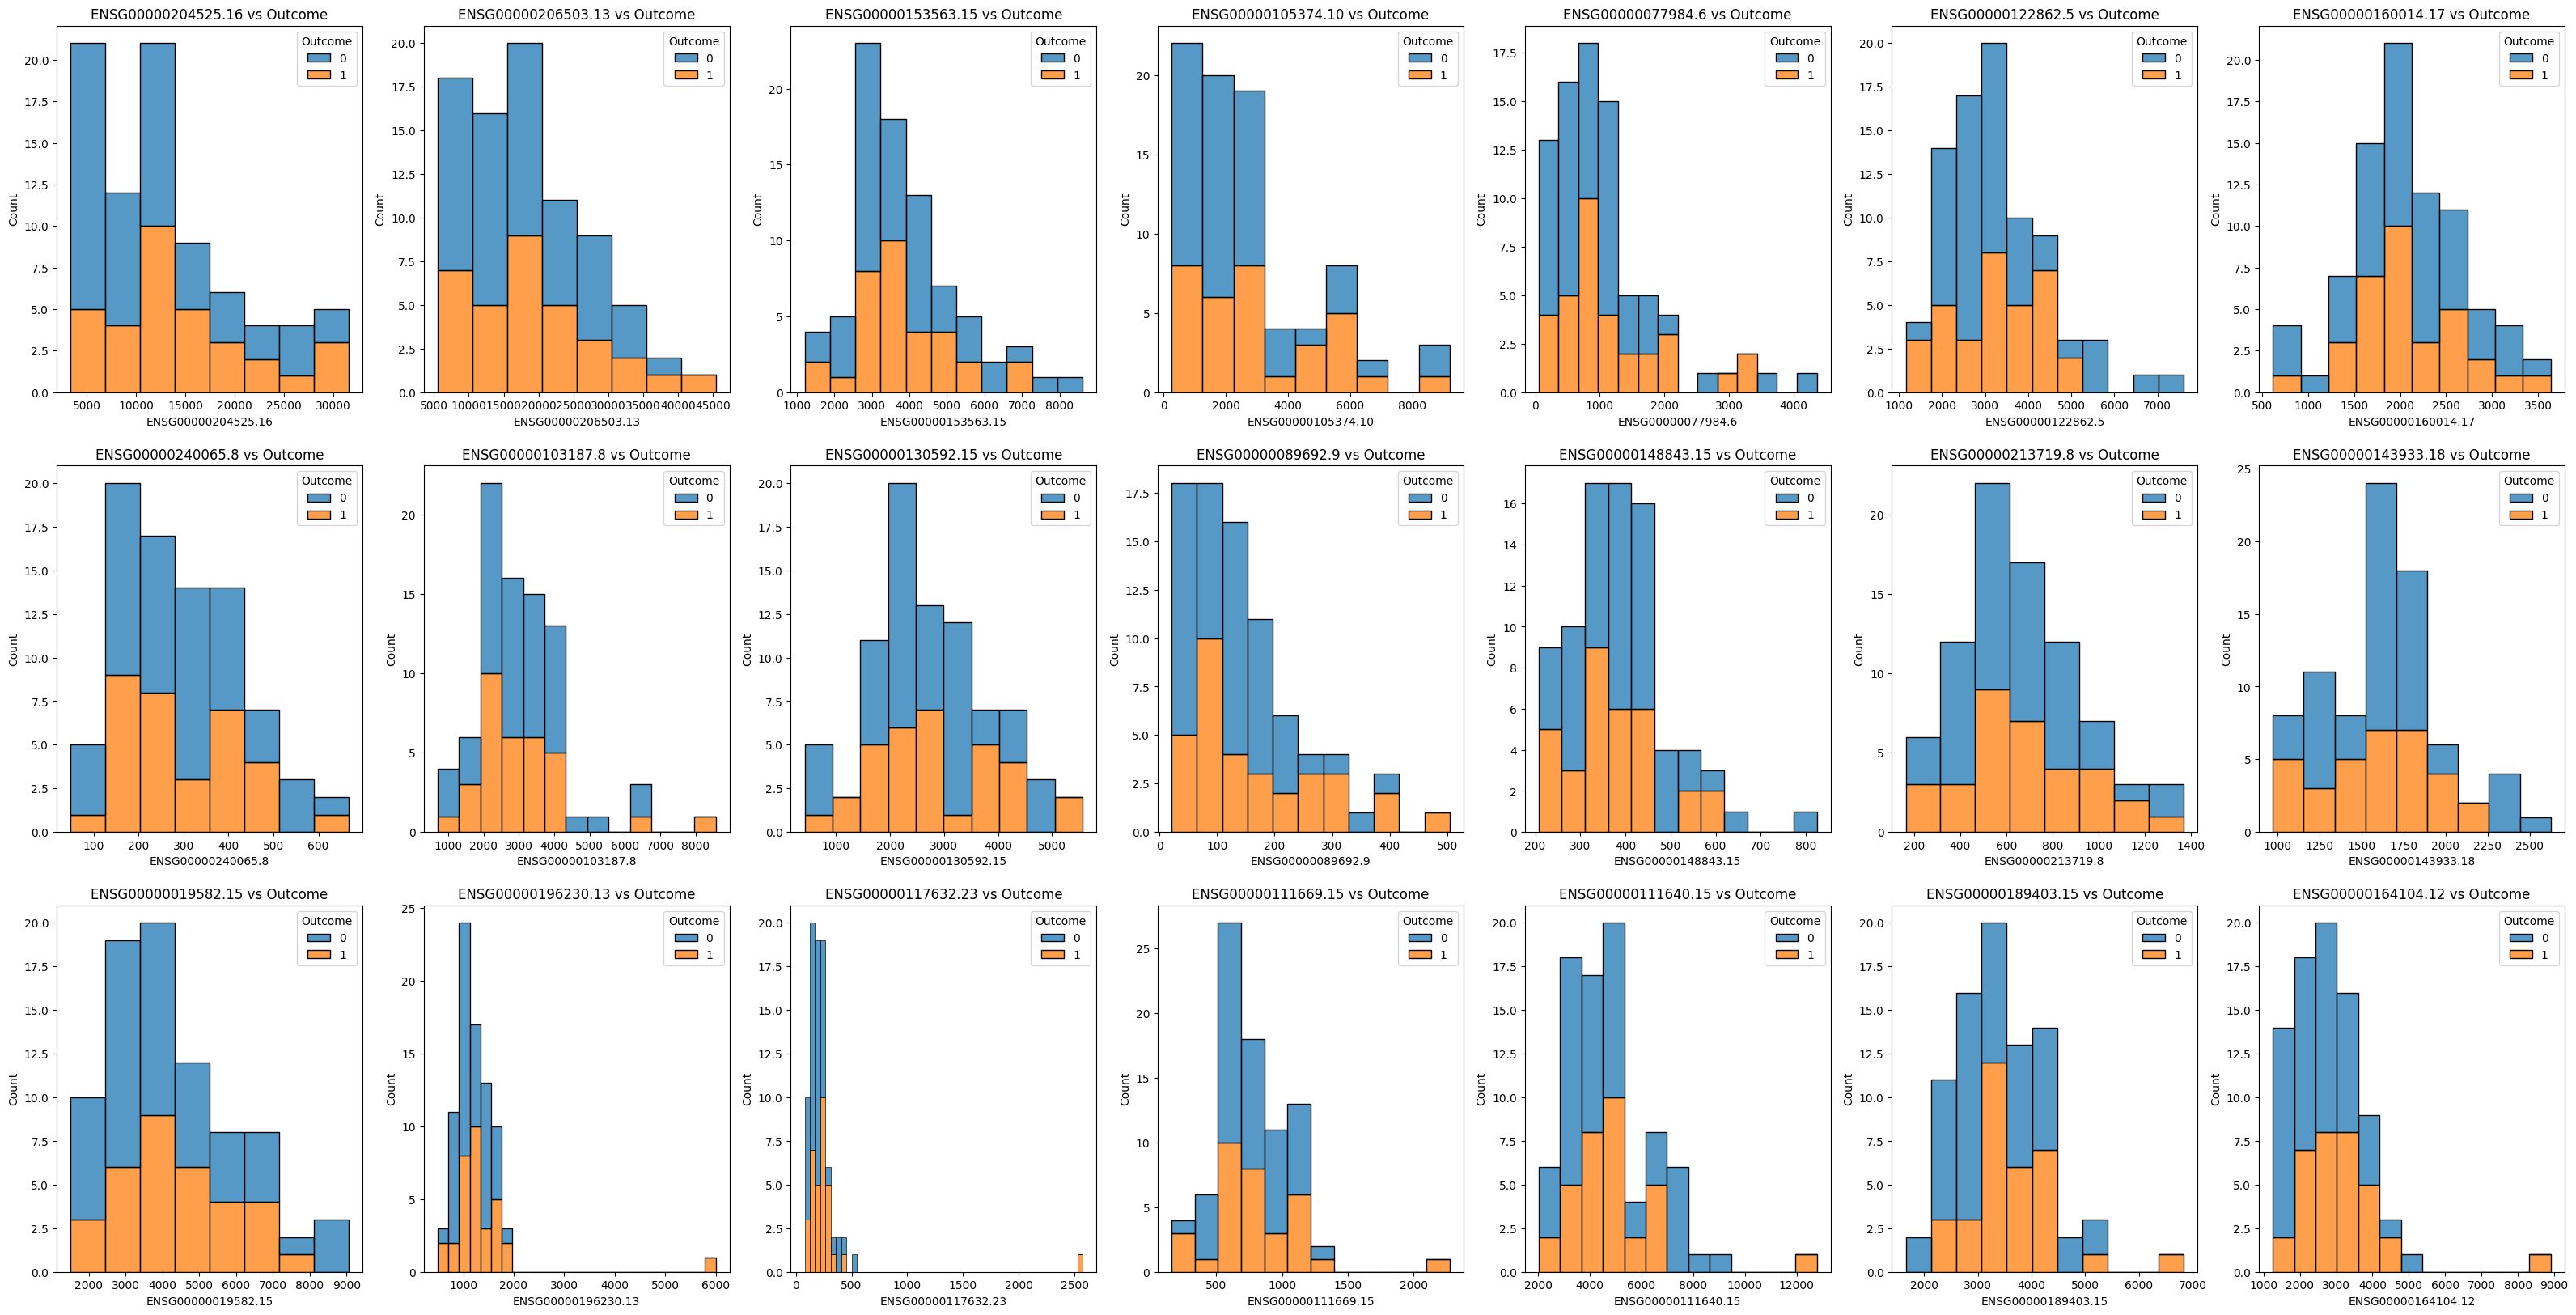

In [23]:
fig,axs = plt.subplots(3,7, figsize=(40,20))
axs = axs.flatten()
for n in range(0,len(df1_numeric.columns)):
  sns.histplot(data=df1, x=col[n], hue = 'Outcome', multiple = 'stack', ax = axs[n])
  axs[n].set_title(df1_numeric.columns[n] + " vs Outcome")

#plt.tight_layout()
plt.show()

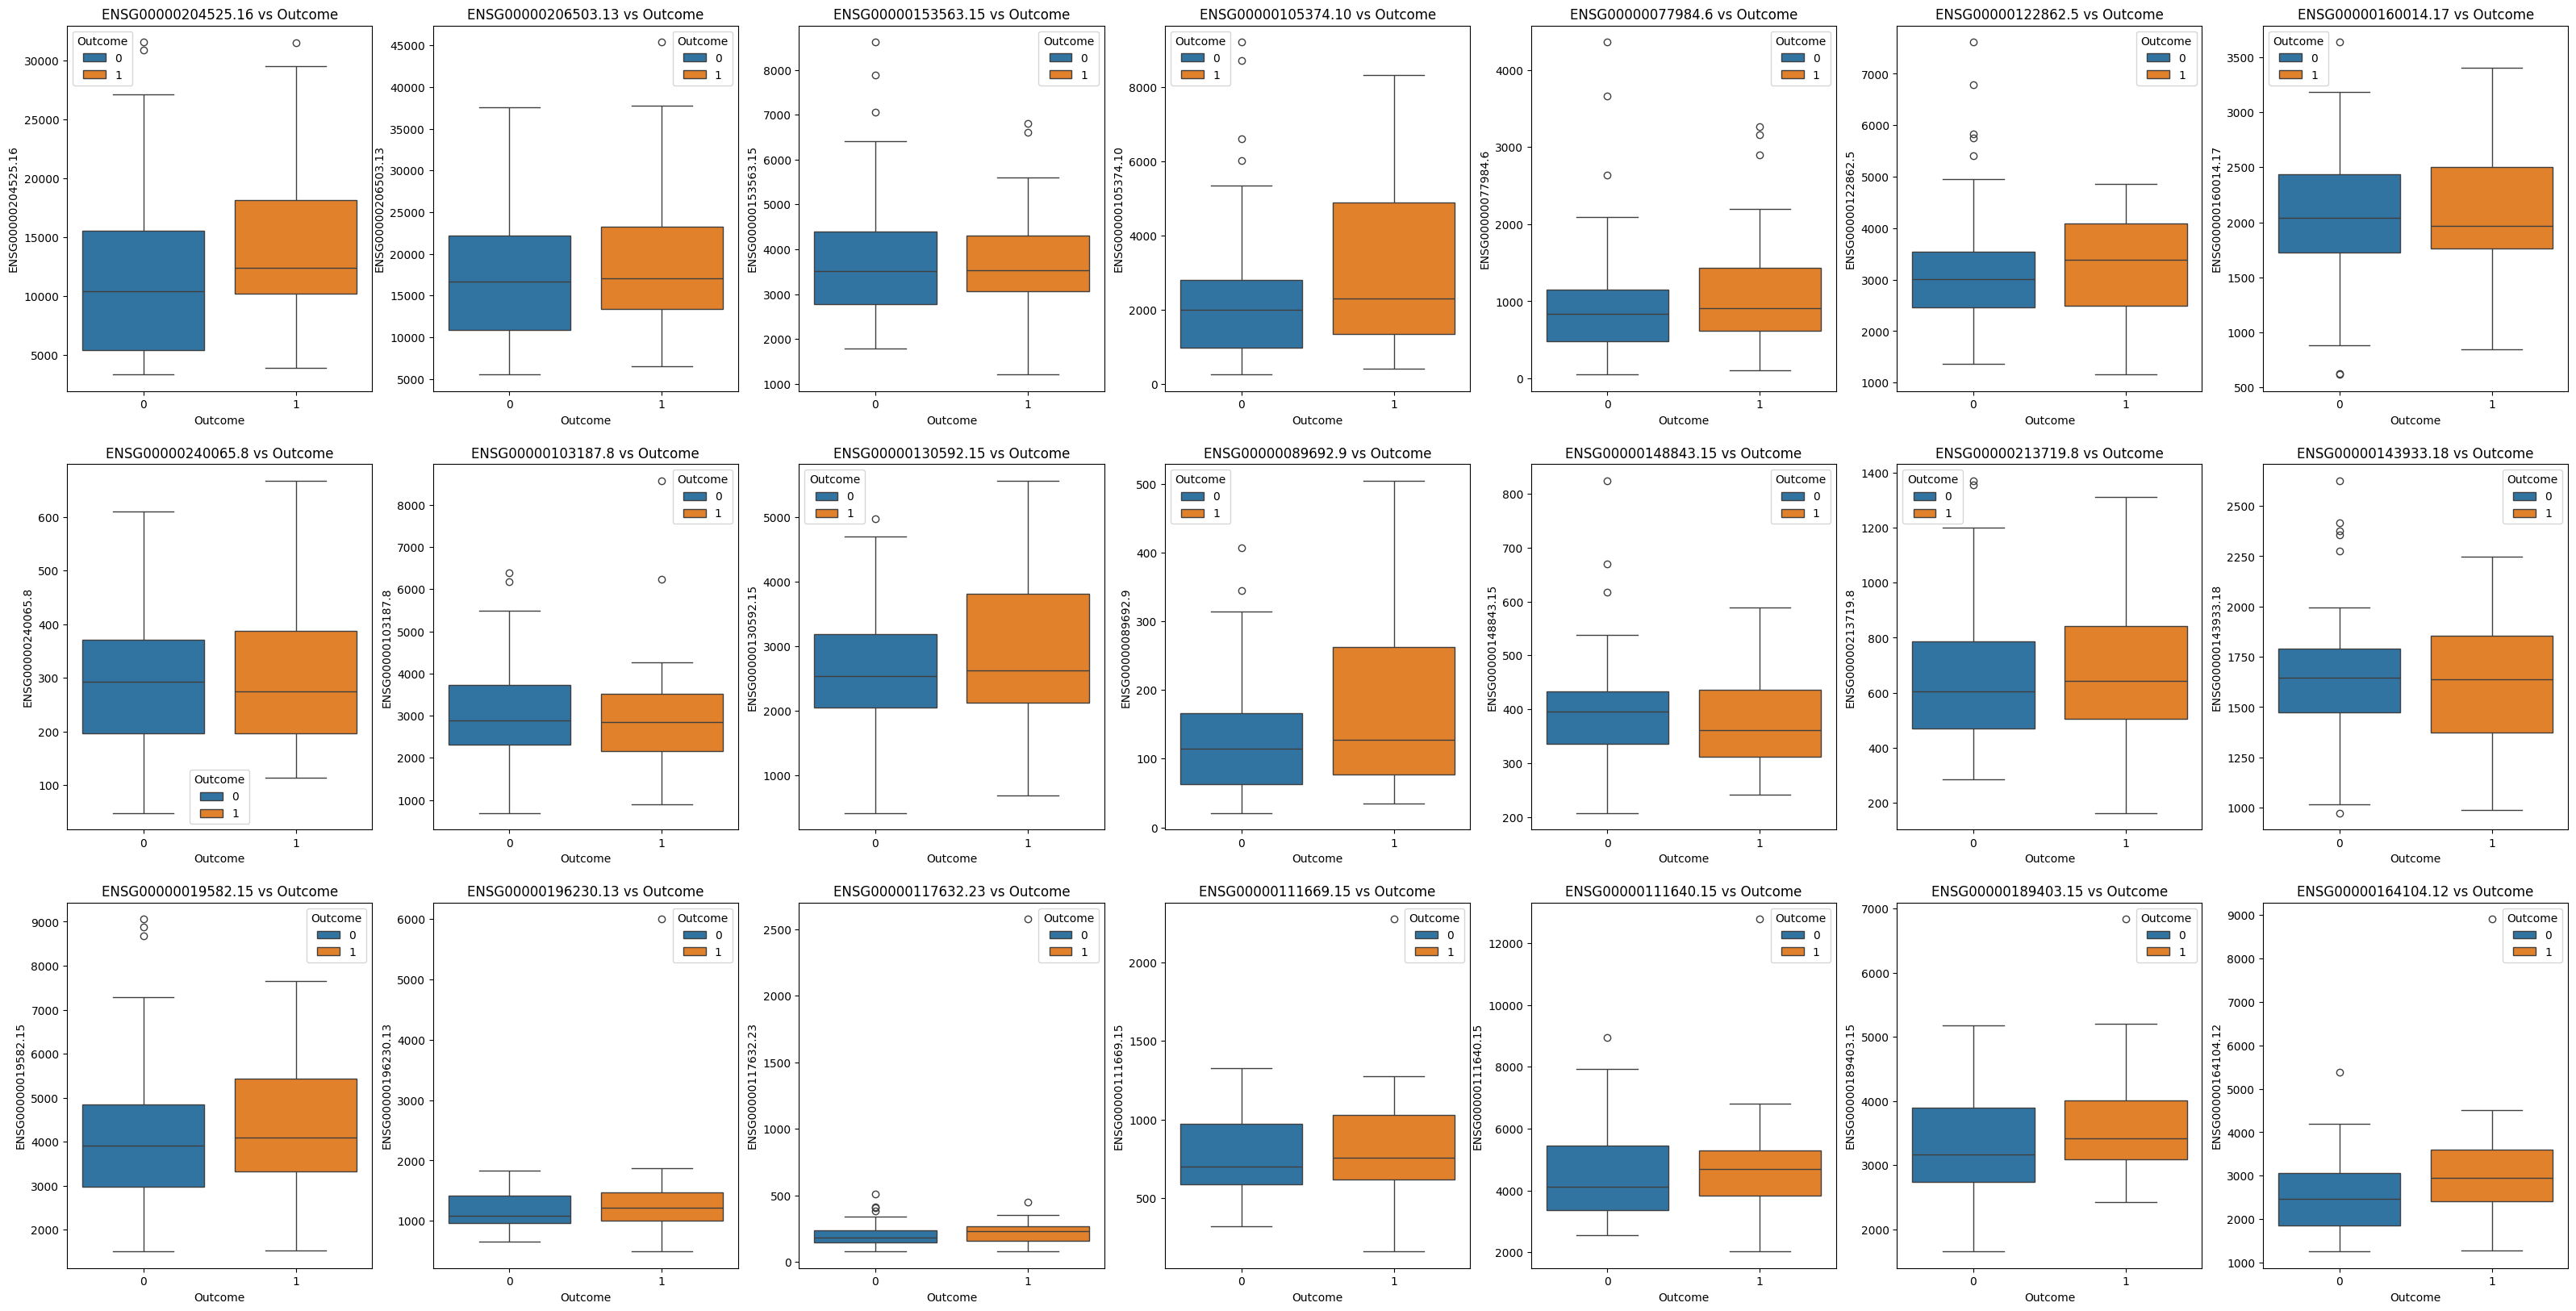

In [24]:
fig,axs = plt.subplots(3,7, figsize=(40,20))
axs = axs.flatten()
for n in range(0,len(df1_numeric.columns)):
  sns.boxplot(data=df1, y=col[n], x = 'Outcome',  ax = axs[n], hue = "Outcome")
  axs[n].set_title(df1_numeric.columns[n] + " vs Outcome")

#plt.tight_layout()
plt.show()

## Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scale_col = df1_filtered.select_dtypes(include=["float"]).columns
scale_col

Index(['ENSG00000204525.16', 'ENSG00000206503.13', 'ENSG00000153563.15',
       'ENSG00000105374.10', 'ENSG00000077984.6', 'ENSG00000122862.5',
       'ENSG00000160014.17', 'ENSG00000240065.8', 'ENSG00000103187.8',
       'ENSG00000130592.15', 'ENSG00000089692.9', 'ENSG00000148843.15',
       'ENSG00000213719.8', 'ENSG00000143933.18', 'ENSG00000019582.15',
       'ENSG00000196230.13', 'ENSG00000117632.23', 'ENSG00000111669.15',
       'ENSG00000111640.15', 'ENSG00000189403.15', 'ENSG00000164104.12'],
      dtype='object')

In [28]:
df1_standard  = df1_filtered.copy()


In [29]:
df1_standard[scale_col] = scaler.fit_transform(df1_standard[scale_col])

#1 Conituous data only, 21 gene expression

## Correlation matrix - on **filtered** dataset

In [30]:
corr_col = df1_standard.select_dtypes(include=["float"]).columns
corr_col = corr_col.tolist()
corr_col.append('Outcome')
corr_col = pd.Index(corr_col)
corr_col

Index(['ENSG00000204525.16', 'ENSG00000206503.13', 'ENSG00000153563.15',
       'ENSG00000105374.10', 'ENSG00000077984.6', 'ENSG00000122862.5',
       'ENSG00000160014.17', 'ENSG00000240065.8', 'ENSG00000103187.8',
       'ENSG00000130592.15', 'ENSG00000089692.9', 'ENSG00000148843.15',
       'ENSG00000213719.8', 'ENSG00000143933.18', 'ENSG00000019582.15',
       'ENSG00000196230.13', 'ENSG00000117632.23', 'ENSG00000111669.15',
       'ENSG00000111640.15', 'ENSG00000189403.15', 'ENSG00000164104.12',
       'Outcome'],
      dtype='object')

### filtered

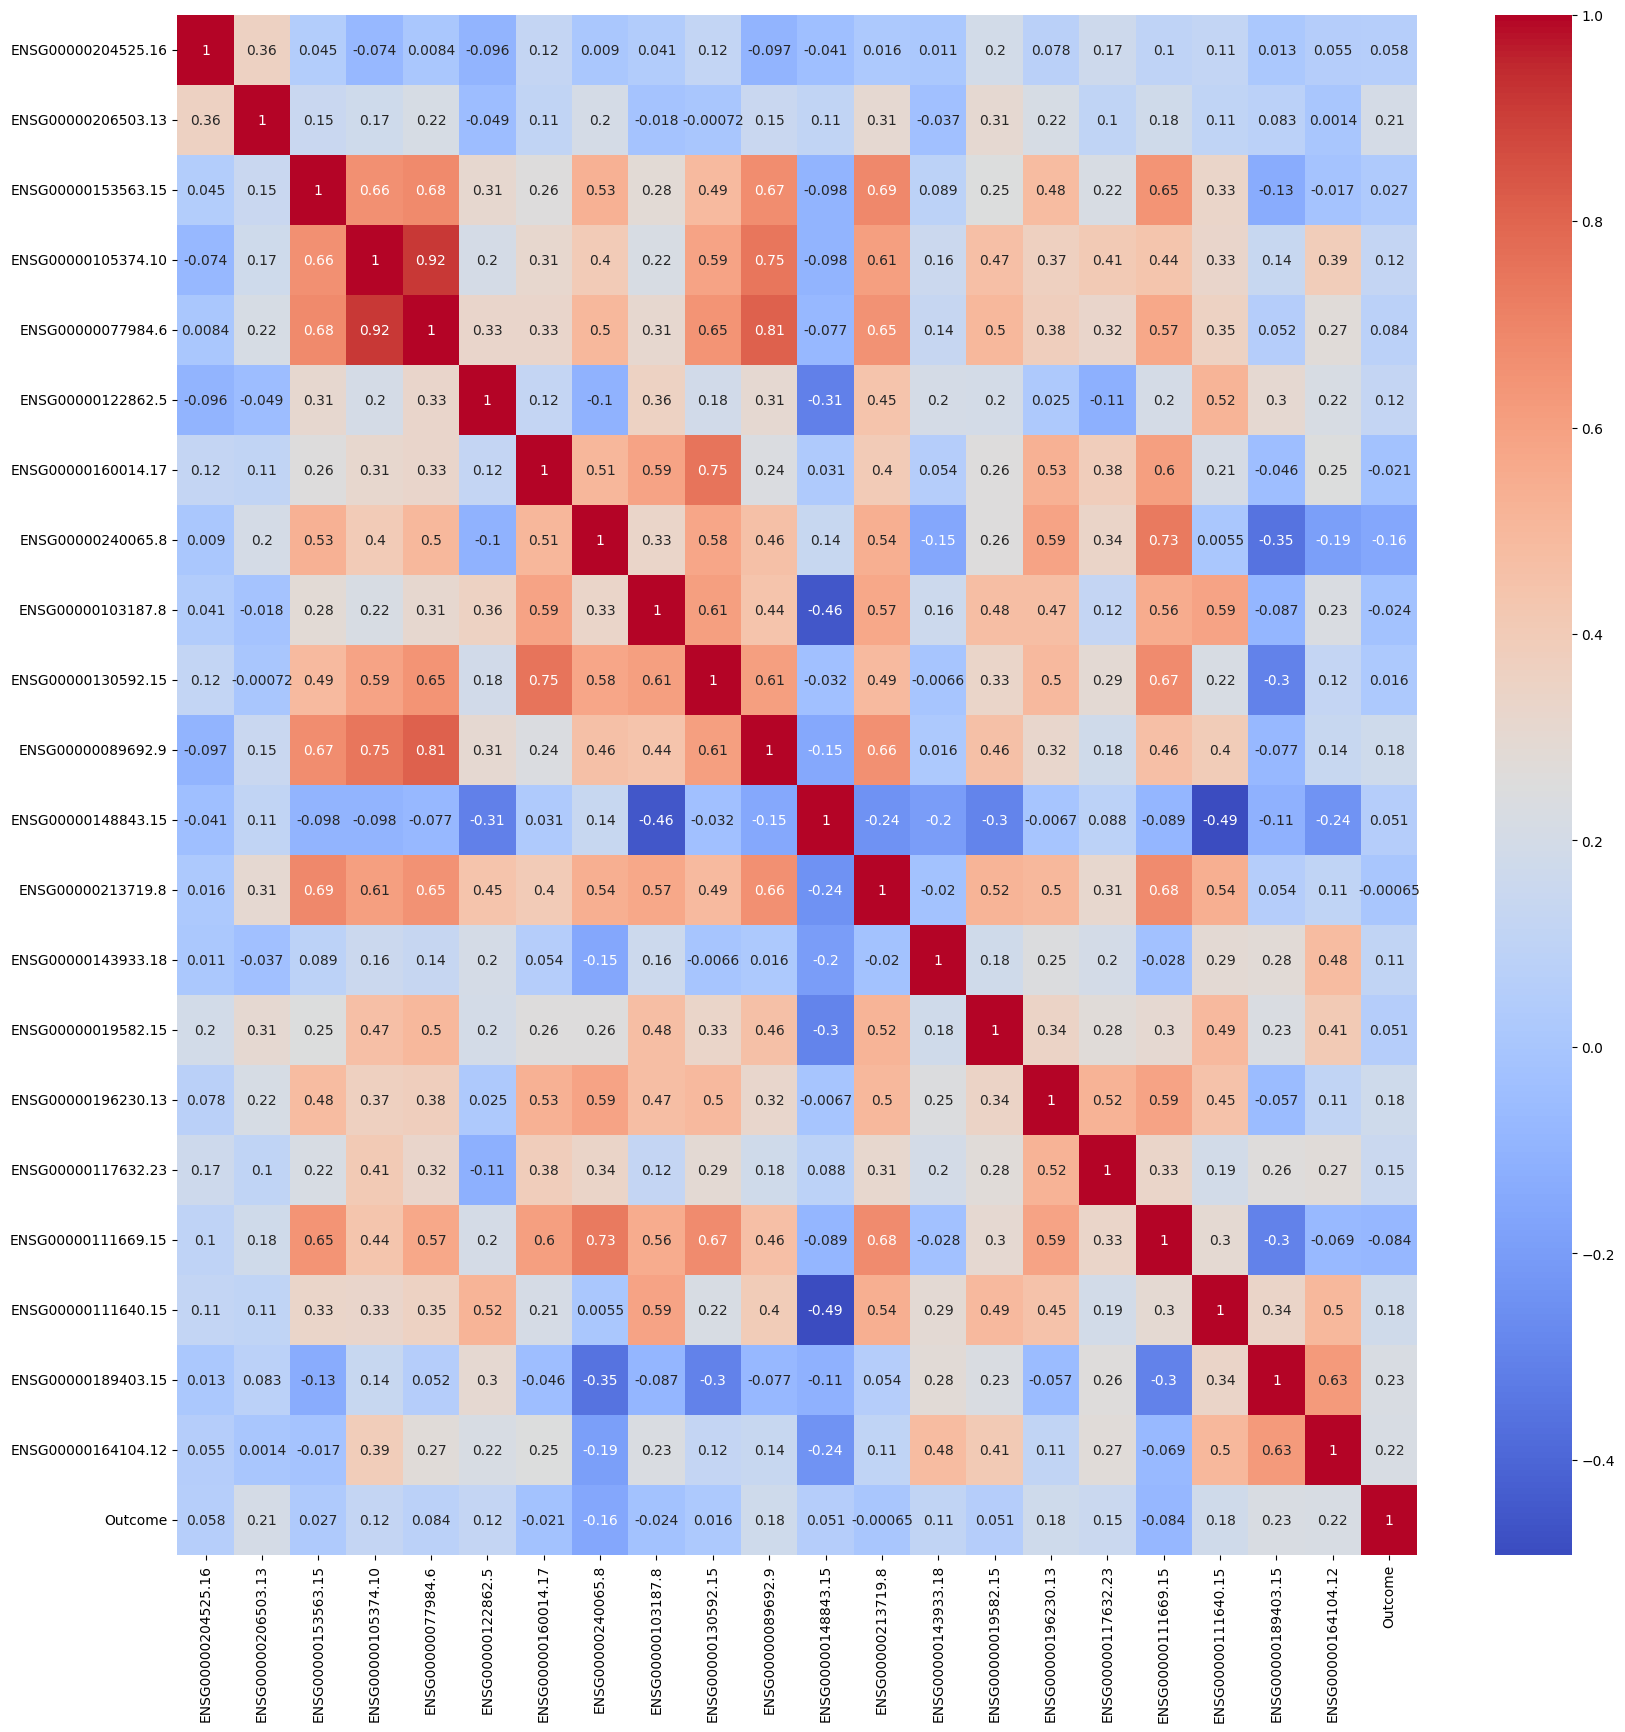

In [31]:
corr_total = df1_filtered[corr_col].corr()
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_total, annot=True, cmap='coolwarm')
plt.show()

### standardized -- the same with filtered

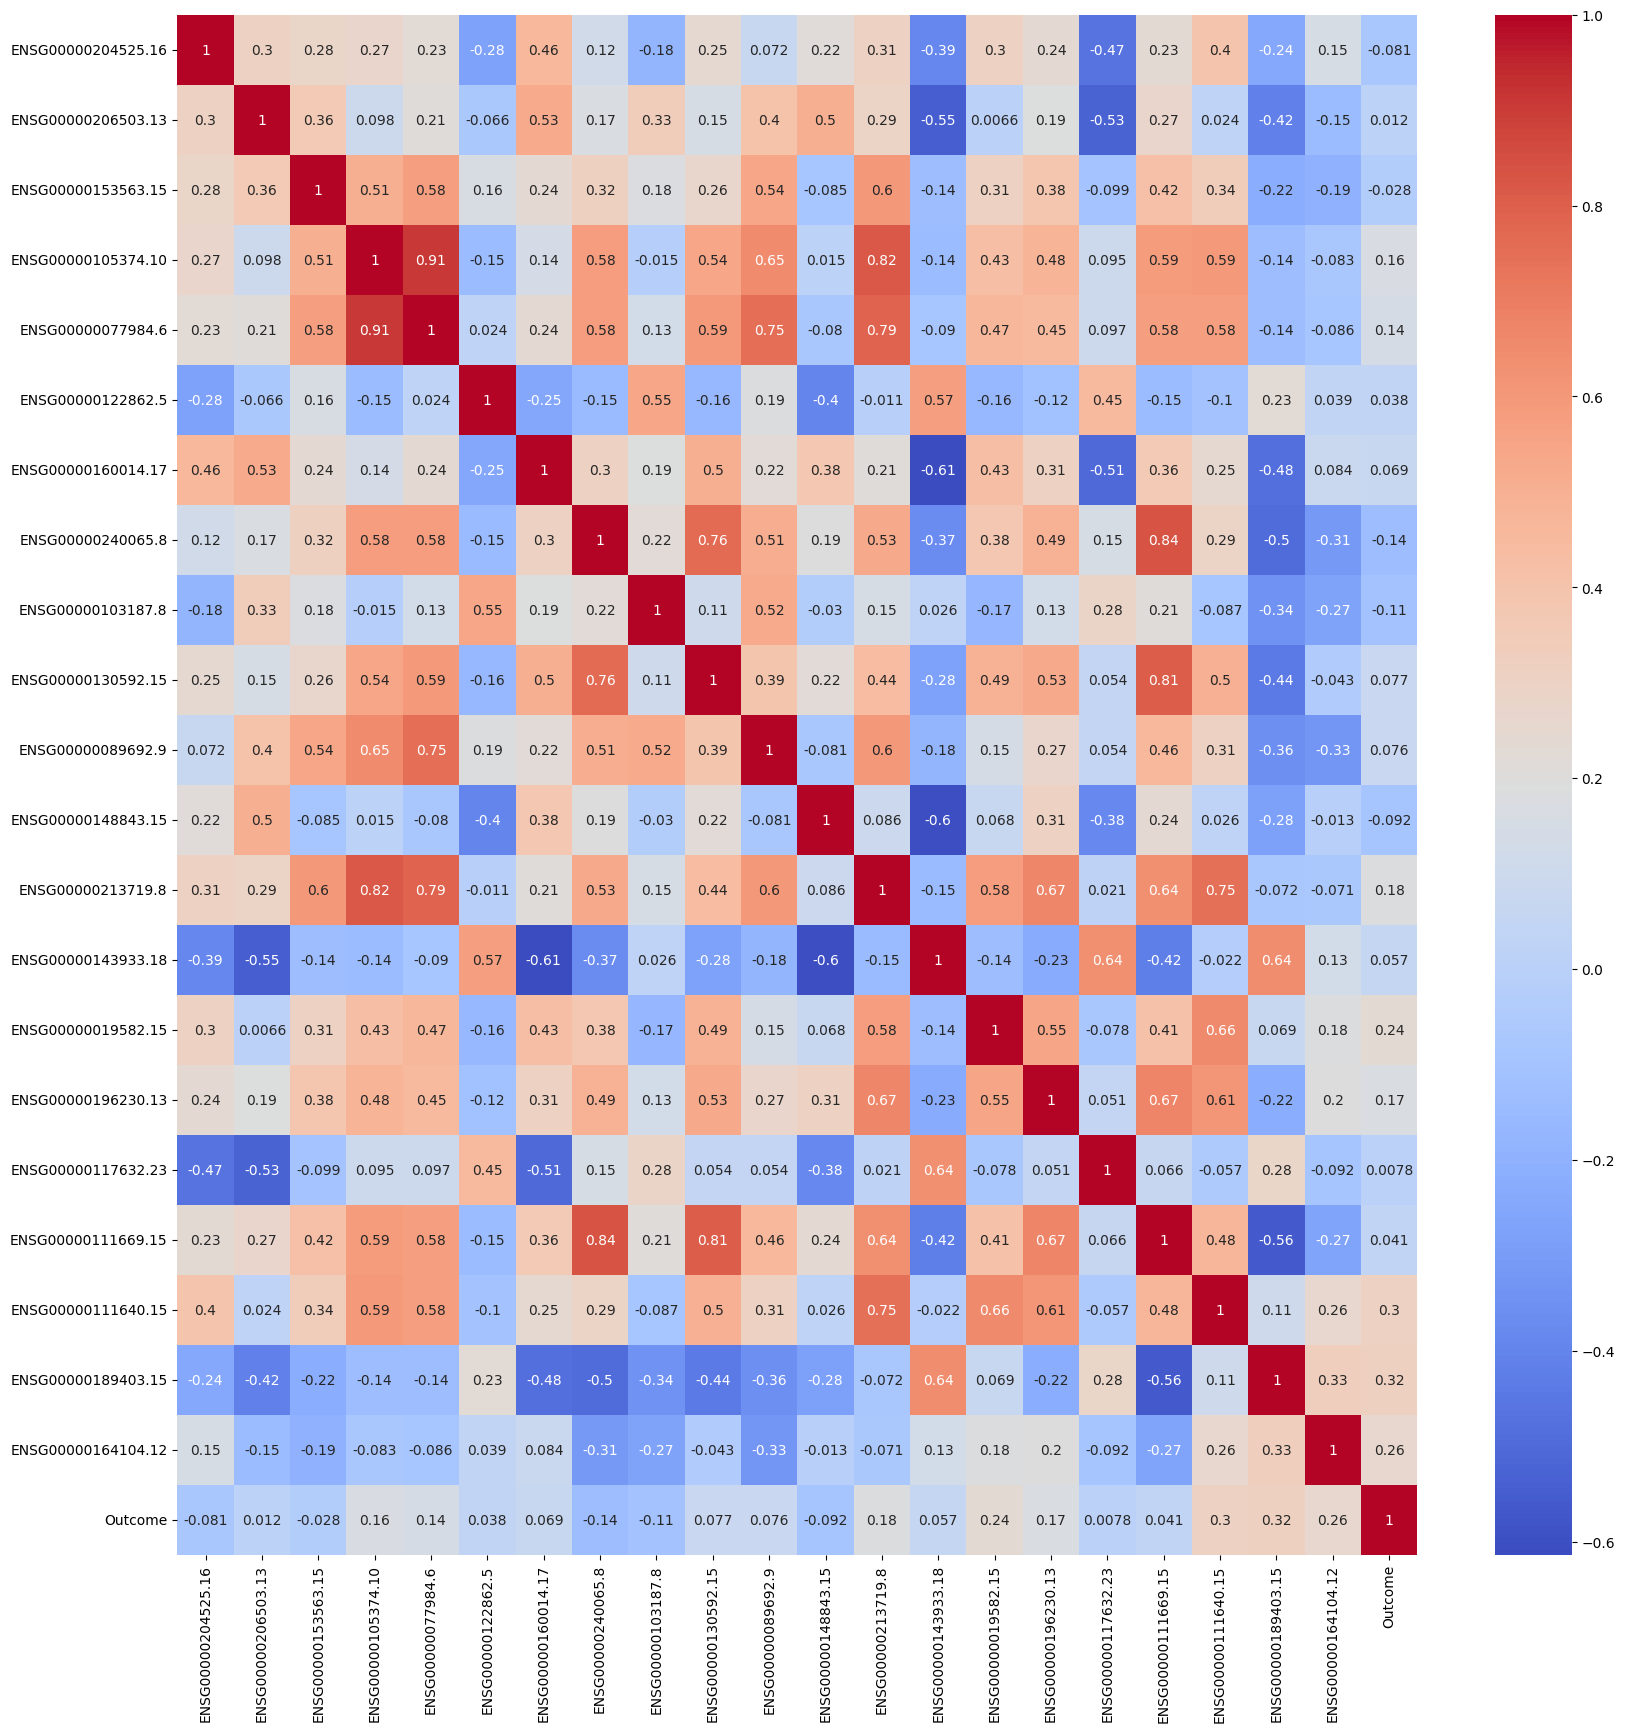

In [ ]:
corr_total = df1_standard[corr_col].corr()
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_total, annot=True, cmap='coolwarm')
plt.show()

### heatmap with p-values

In [32]:
from scipy.stats import pearsonr

In [33]:
def corr_with_p(df,col):
    rho = df[col].corr()
    pval = df[col].corr(method = lambda x,y: pearsonr(x,y)[1])-np.eye(*rho.shape)
    return rho, pval

In [34]:
corr_matrix, p_value = corr_with_p(df1_standard, corr_col)

In [35]:
annotations = corr_matrix.round(2).astype(str) + '\n' + p_value.round(4).astype(str)

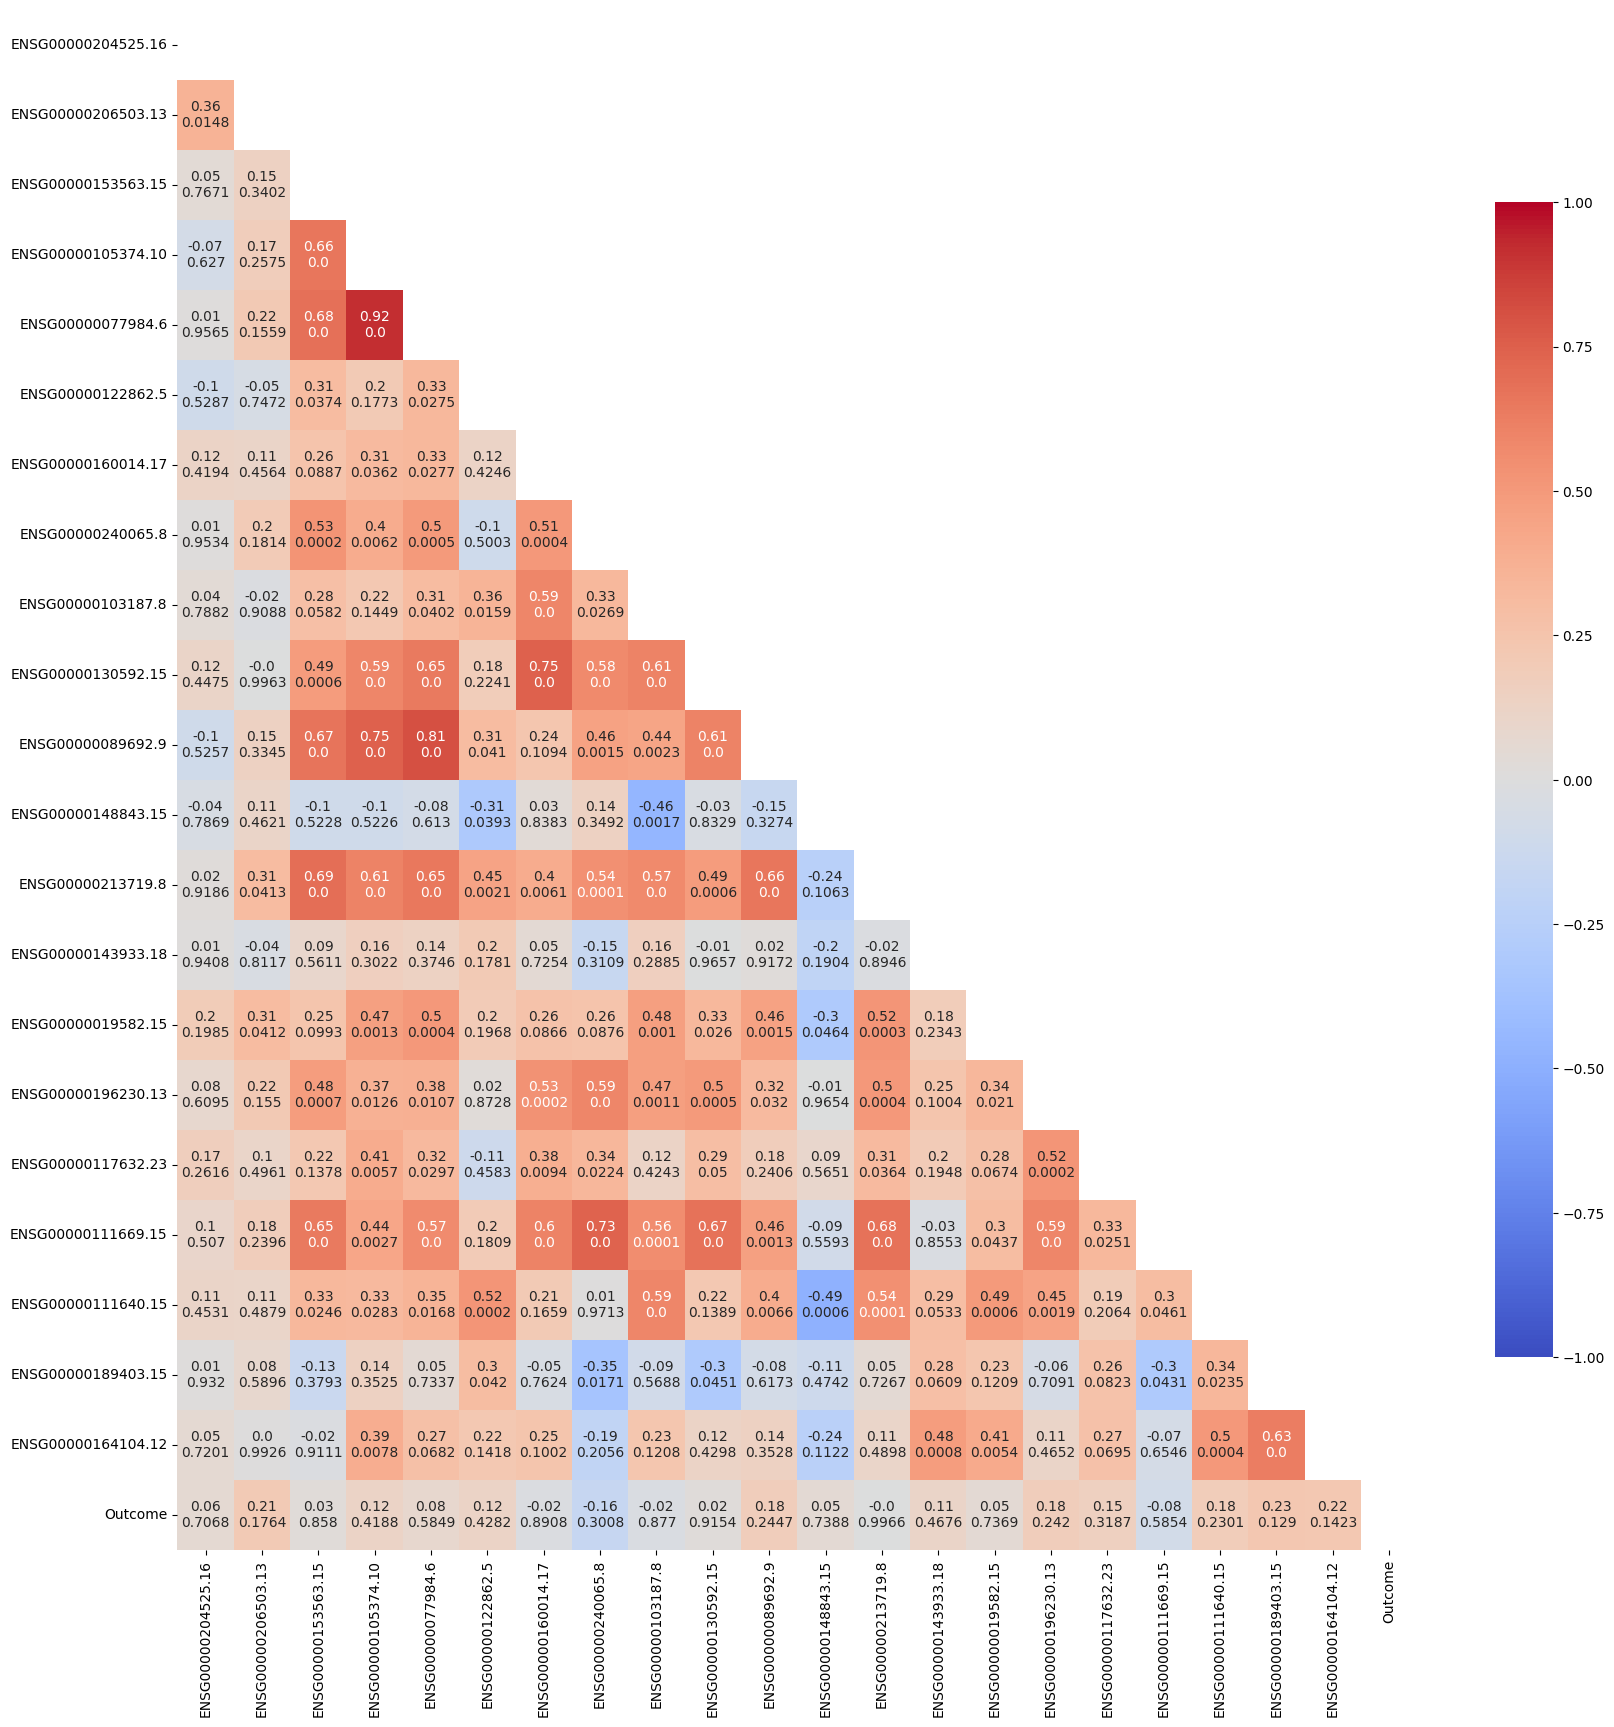

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=annotations, fmt = "", cmap='coolwarm', vmin = -1, vmax =1,
            cbar_kws={"shrink":0.75},mask = np.triu(np.ones_like(corr_matrix,dtype=bool)))
plt.show()

In [ ]:
corr_col

Index(['Sex', 'PD-L1 Status', 'Disease Stage', 'Outcome'], dtype='object')

In [ ]:
corr_matrix, p_value = corr_with_p(df1, corr_col)

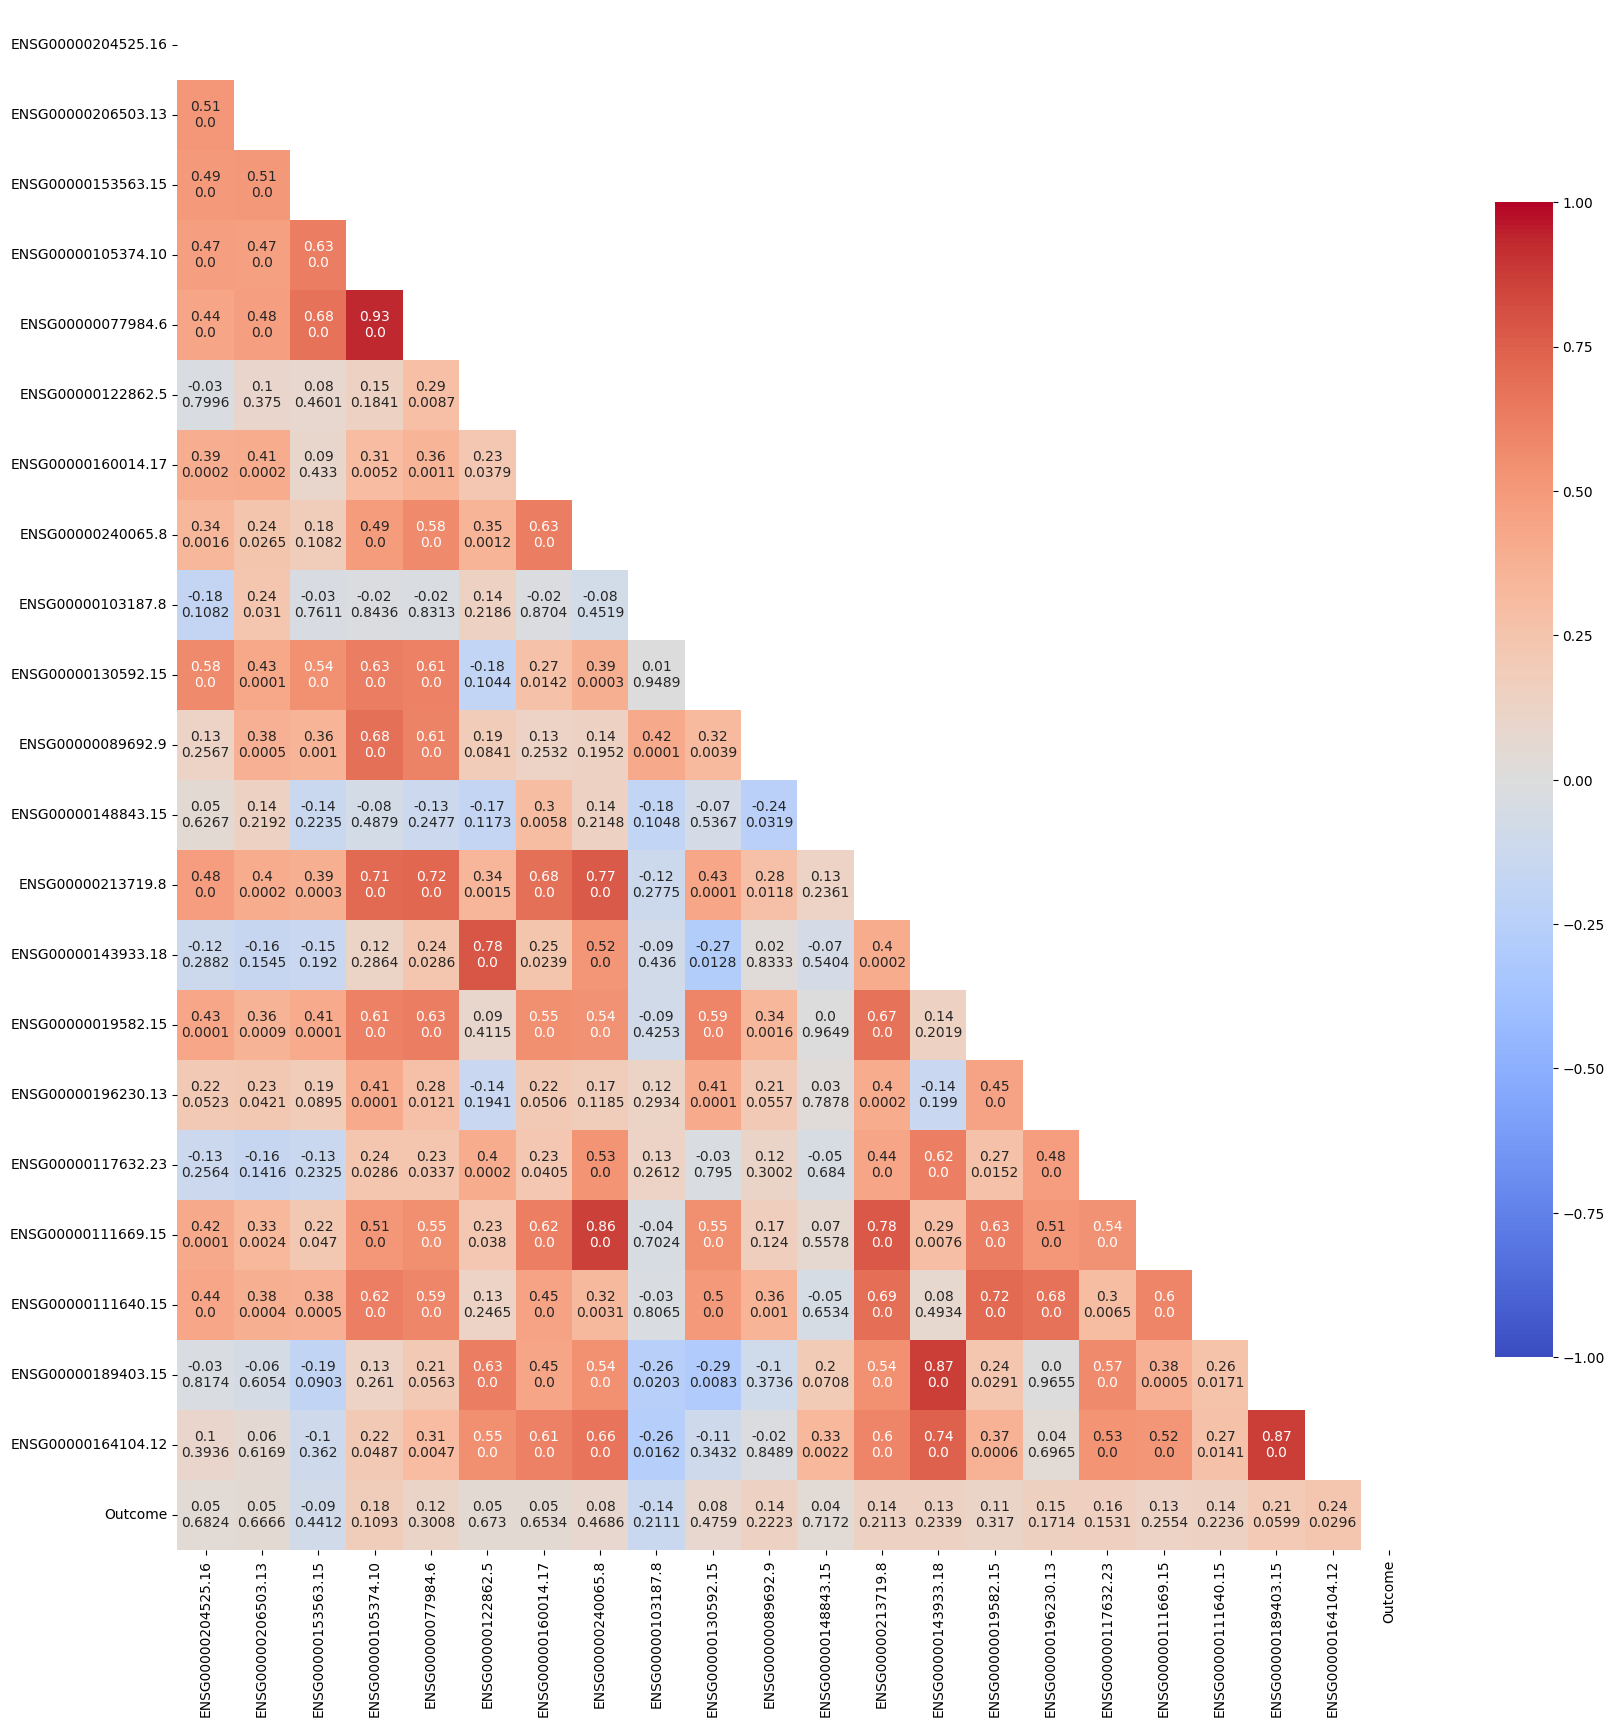

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=annotations, fmt = "", cmap='coolwarm', vmin = -1, vmax =1,
            cbar_kws={"shrink":0.75},mask = np.triu(np.ones_like(corr_matrix,dtype=bool)))
plt.show()

In [ ]:
annotations = corr_matrix.round(2).astype(str) + '\n' + p_value.round(4).astype(str)

In [ ]:
corr_col_1 = corr_col[-4:]
corr_col_1

Index(['ENSG00000111640.15', 'ENSG00000189403.15', 'ENSG00000164104.12',
       'Outcome'],
      dtype='object')

In [ ]:
corr_matrix, p_value = corr_with_p(df1_standard, corr_col_1)

In [ ]:
annotations = corr_matrix.round(2).astype(str) + '\n' + p_value.round(4).astype(str)

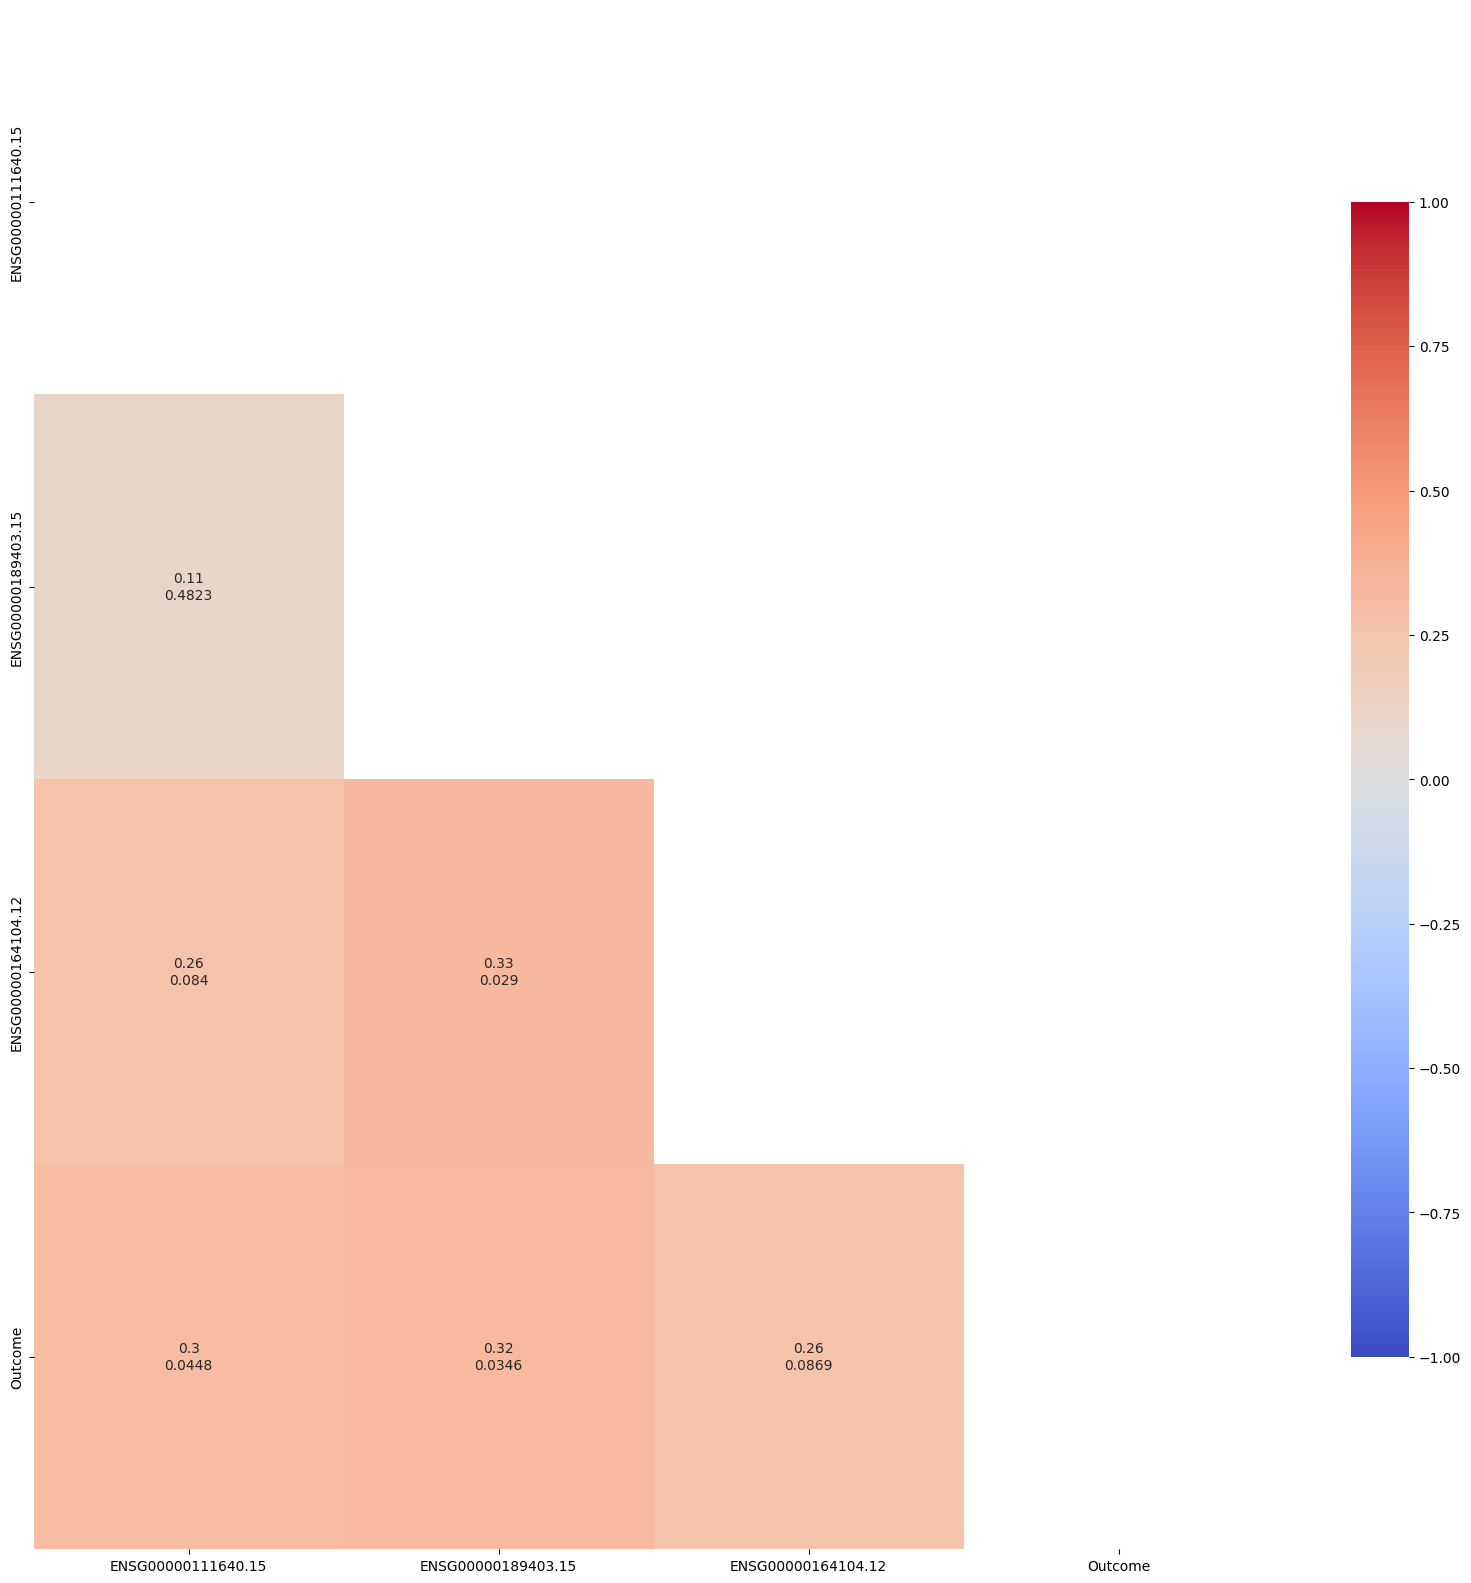

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=annotations, fmt = "", cmap='coolwarm', vmin = -1, vmax =1,
            cbar_kws={"shrink":0.75},mask = np.triu(np.ones_like(corr_matrix,dtype=bool)))
plt.show()

##Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#top features
feature_selected = corr_col_1.drop(['Outcome'])
feature_selected

Index(['ENSG00000111640.15', 'ENSG00000189403.15', 'ENSG00000164104.12'], dtype='object')

In [ ]:
x_selected = df1[feature_selected]
x_selected.head()

,ENSG00000111640.15,ENSG00000189403.15,ENSG00000164104.12
0,16539.816199,6477.893233,3133.560181
1,13512.347944,7927.377715,3927.823214
2,21523.909225,7582.560071,5731.020296
3,8909.424434,20135.297142,12340.708360
4,30963.486665,9938.266951,5696.195888


In [ ]:
y = df1['Outcome']
y.head()

,Outcome
0,0
1,0
2,1
3,1
4,0


In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x_selected,y, test_size = 0.2, random_state = 42)

### Logistic regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred_log = log_reg.predict(x_test)
confusion_matrix_rf = confusion_matrix(y_test, pred_log)
class_report_rf = classification_report(y_test, pred_log)

print("Logistic Regression Confusion Matrix:", confusion_matrix_rf)
print("\nLogistic Regression Classification Report:\n",class_report_rf)



Logistic Regression Confusion Matrix: [[4 0]
 [4 1]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.20      0.33         5

    accuracy                           0.56         9
   macro avg       0.75      0.60      0.50         9
weighted avg       0.78      0.56      0.48         9



### Random forrest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

confusion_matrix_rf = confusion_matrix(y_test, y_pred)
class_report_rf = classification_report(y_test, y_pred)

print("Random Forrest Confusion Matrix:", confusion_matrix_rf)
print("\nClassification Report:\n",class_report_rf)


Random Forrest Confusion Matrix: [[8 2]
 [6 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.33      0.14      0.20         7

    accuracy                           0.53        17
   macro avg       0.45      0.47      0.43        17
weighted avg       0.47      0.53      0.47        17



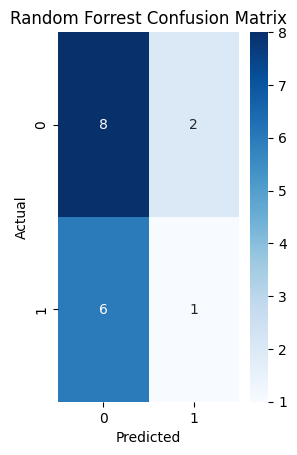

In [ ]:
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix_rf, annot= True, cmap = "Blues", fmt = "d" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forrest Confusion Matrix')

plt.show()


#2. Categorical data only

In [ ]:
df1 = polyA_df[0].copy()

In [ ]:
categorical_col = df1.select_dtypes(include=["object","int"]).columns.drop(['SampleID',"Outcome","Age"])
categorical_col

Index(['Sex', 'PD-L1 Status', 'Disease Stage'], dtype='object')

In [ ]:
df1[categorical_col].head()


,Sex,Age,PD-L1 Status,Disease Stage
0,M,83,NEGATIVE,STAGE IV
1,F,50,NEGATIVE,STAGE IV
2,M,65,POSITIVE,STAGE III
3,F,40,POSITIVE,STAGE IV
4,F,88,NEGATIVE,STAGE IV


## Convert categorigal to ordinal/binomial


*   PD-L1: negative: 0, positive:1
*   Disease stage: stage 1-4: 1,2,3,4
*   Sex: Male: 0, Female: 1





In [ ]:
df1_filtered['PD-L1 Status'] = df1_filtered['PD-L1 Status'].replace({'NEGATIVE': 0, 'POSITIVE': 1})
df1_filtered['Disease Stage'] = df1_filtered['Disease Stage'].replace({'STAGE I': 1, 'STAGE II': 2, 'STAGE III': 3, 'STAGE IV': 4})
df1_filtered['Sex'] = df1_filtered['Sex'].replace({'M': 0, 'F': 1})


<ipython-input-276-fb12562d4eb7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_filtered['Disease Stage'] = df1_filtered['Disease Stage'].replace({'STAGE I': 1, 'STAGE II': 2, 'STAGE III': 3, 'STAGE IV': 4})
<ipython-input-276-fb12562d4eb7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_filtered['Sex'] = df1_filtered['Sex'].replace({'M': 0, 'F': 1})


In [ ]:
df1_filtered[categorical_col].head()

,Sex,Age,PD-L1 Status,Disease Stage
0,0,83,0,4
1,1,50,0,4
6,0,61,1,4
7,0,29,1,4
8,0,52,0,3


## Chi-squared

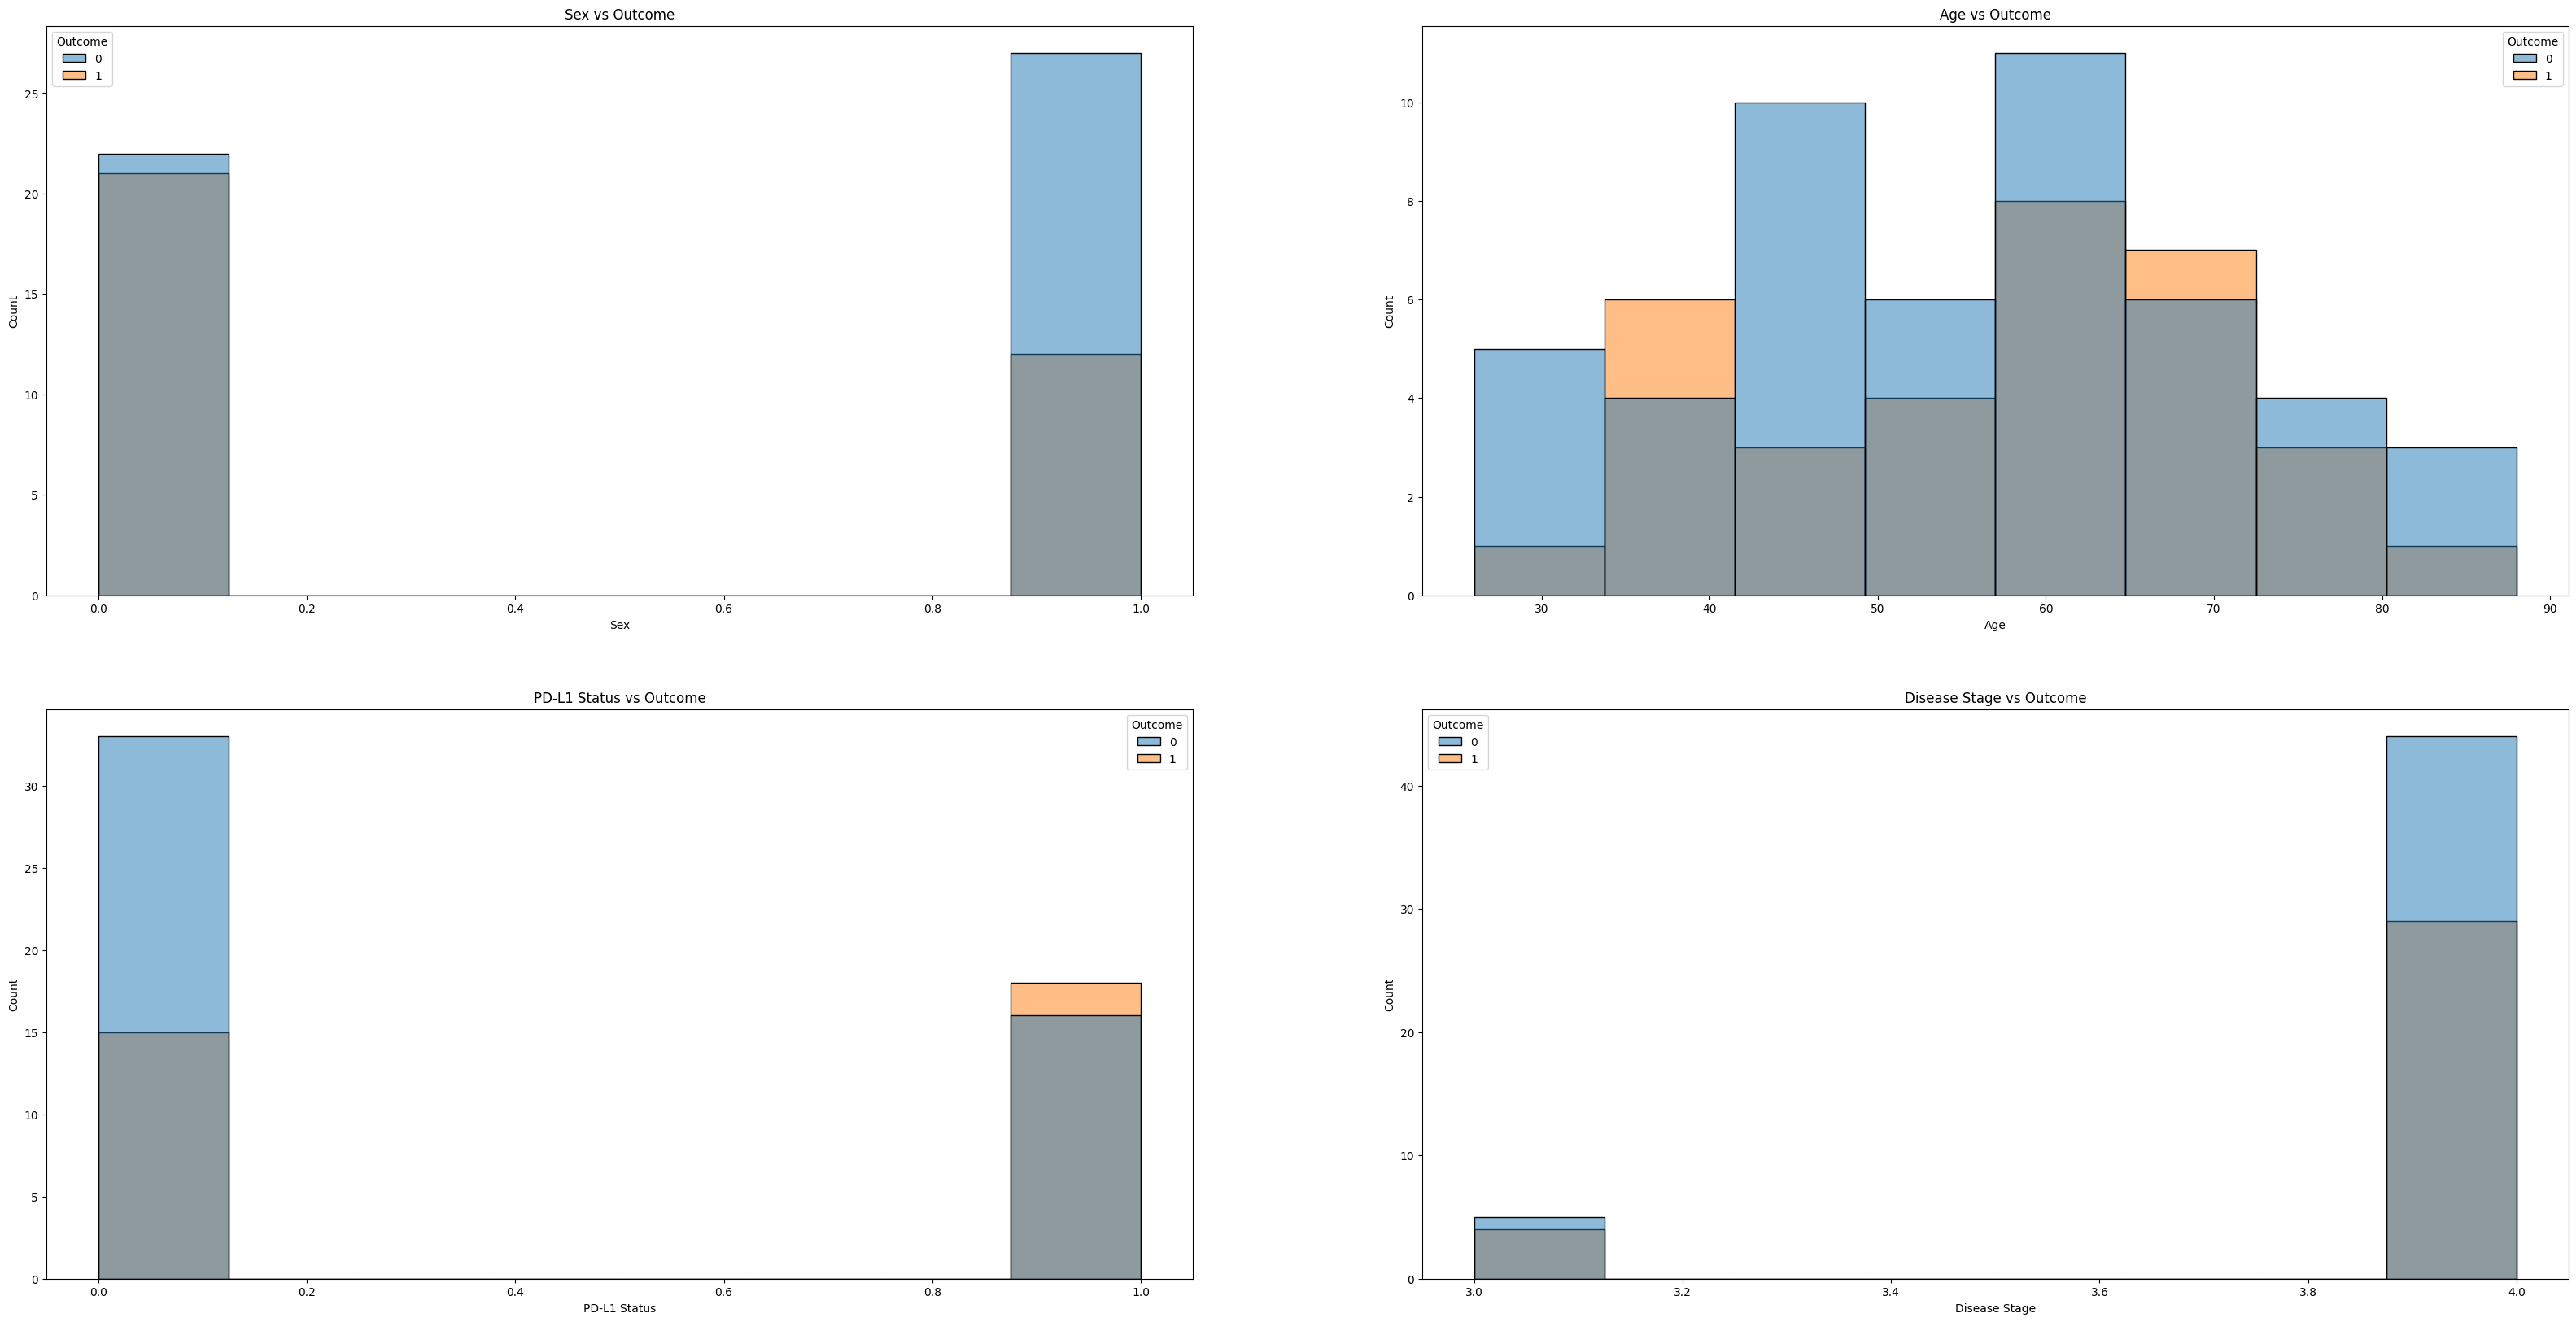

In [ ]:
fig,axs = plt.subplots(2,2, figsize=(40,20))
axs = axs.flatten()
for n in range(0,len(categorical_col)):
  sns.histplot(data=df1, x=categorical_col[n], hue = 'Outcome',  ax = axs[n])
  axs[n].set_title(categorical_col[n] + " vs Outcome")

#plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
for x in range(0,len(categorical_col)):
  contingency_table = pd.crosstab(df1[categorical_col[x]], df1['Outcome'])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  print(categorical_col[x])
  print("Chi-squared statistic:", chi2)
  print("P-value:", p)

Sex
Chi-squared statistic: 2.0757419029844284
P-value: 0.14965715380016015
PD-L1 Status
Chi-squared statistic: 3.0441941928286456
P-value: 0.08102631814216618
Disease Stage
Chi-squared statistic: 0.0
P-value: 1.0


In [ ]:
corr_col = categorical_col.tolist()
corr_col.append('Outcome')
corr_col.remove('Age')
corr_col = pd.Index(corr_col)
corr_col

Index(['Sex', 'PD-L1 Status', 'Disease Stage', 'Outcome'], dtype='object')

<ipython-input-297-487a6ed0dcc8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['PD-L1 Status'] = df1['PD-L1 Status'].replace({'NEGATIVE': 0, 'POSITIVE': 1})
<ipython-input-297-487a6ed0dcc8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Disease Stage'] = df1['Disease Stage'].replace({'STAGE I': 1, 'STAGE II': 2, 'STAGE III': 3, 'STAGE IV': 4})
<ipython-input-297-487a6ed0dcc8>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicit

# 3 Combination

In [ ]:
#top features
feature_selected = corr_col_1.drop(['Outcome','ENSG00000164104.12'])
feature_selected = feature_selected.tolist()
feature_selected.append('PD-L1 Status')
feature_selected = pd.Index(feature_selected)

feature_selected

Index(['ENSG00000111640.15', 'ENSG00000189403.15', 'PD-L1 Status'], dtype='object')

In [ ]:
df1['PD-L1 Status'] = df1['PD-L1 Status'].replace({'NEGATIVE': 0, 'POSITIVE': 1})
df1['Outcome'] = df1['Outcome'].replace({'NCB': 0, 'CB': 1})

#df1['Disease Stage'] = df1['Disease Stage'].replace({'STAGE I': 1, 'STAGE II': 2, 'STAGE III': 3, 'STAGE IV': 4})
#df1['Sex'] = df1['Sex'].replace({'M': 0, 'F': 1})
df1.head()

<ipython-input-331-cae13c0137f7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Outcome'] = df1['Outcome'].replace({'NCB': 0, 'CB': 1})


,SampleID,Outcome,Sex,Age,PD-L1 Status,Disease Stage,ENSG00000204525.16,ENSG00000206503.13,ENSG00000153563.15,ENSG00000105374.10,...,ENSG00000148843.15,ENSG00000213719.8,ENSG00000143933.18,ENSG00000019582.15,ENSG00000196230.13,ENSG00000117632.23,ENSG00000111669.15,ENSG00000111640.15,ENSG00000189403.15,ENSG00000164104.12
0,R-BMS001,0,M,83,0,STAGE IV,39309.085043,18578.818609,9027.479350,5168.702305,...,199.354199,1593.379575,4031.001472,9252.895484,953.739520,156.947018,1986.632264,16539.816199,6477.893233,3133.560181
1,R-BMS002,0,F,50,0,STAGE IV,45661.383422,20132.252442,6417.958516,2653.277335,...,175.890044,1047.755859,7713.968603,10221.462976,803.133140,566.424256,1832.787004,13512.347944,7927.377715,3927.823214
2,R-BMS003,1,M,65,1,STAGE III,39392.023180,23035.878469,8719.157511,7951.597035,...,159.397806,2342.506523,8373.175094,15085.569755,1035.518253,697.572779,4033.988405,21523.909225,7582.560071,5731.020296
3,R-BMS004,1,F,40,1,STAGE IV,9898.914976,12692.350142,1982.067971,1318.897902,...,387.963497,1723.471372,24357.722095,11440.203141,561.806110,1602.360355,1906.290402,8909.424434,20135.297142,12340.708360
4,R-BMS005,0,F,88,0,STAGE IV,33137.319541,36834.433355,12250.236352,7041.408860,...,114.962894,1931.569615,9561.790039,18477.169099,727.821467,411.009365,2506.033888,30963.486665,9938.266951,5696.195888


In [ ]:
x_selected = df1[feature_selected]
x_selected.head()
y = df1['Outcome']
y.head()

,Outcome
0,0
1,0
2,1
3,1
4,0


In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x_selected,y, test_size = 0.1, random_state = 42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

pred_log = log_reg.predict(x_test)
confusion_matrix_rf = confusion_matrix(y_test, pred_log)
class_report_rf = classification_report(y_test, pred_log)

print("Logistic Regression Confusion Matrix:", confusion_matrix_rf)
print("\nLogistic Regression Classification Report:\n",class_report_rf)

Logistic Regression Confusion Matrix: [[4 2]
 [1 2]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.50      0.67      0.57         3

    accuracy                           0.67         9
   macro avg       0.65      0.67      0.65         9
weighted avg       0.70      0.67      0.68         9



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

confusion_matrix_rf = confusion_matrix(y_test, y_pred)
class_report_rf = classification_report(y_test, y_pred)

print("Random Forrest Confusion Matrix:", confusion_matrix_rf)
print("\nClassification Report:\n",class_report_rf)


Random Forrest Confusion Matrix: [[3 3]
 [1 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.40      0.67      0.50         3

    accuracy                           0.56         9
   macro avg       0.57      0.58      0.55         9
weighted avg       0.63      0.56      0.57         9

